In [ ]:
from scipy.io import netcdf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ML to predict the future climate

#### **RF**

##### 4.5

In [ ]:
Ensemble=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/tensemble45.csv')
Ensemble['Date']=pd.to_datetime(Ensemble.Date, format='%m/%d/%Y')
# Ensemble=Ensemble.set_index('Date')
# Ensemble=Ensemble.asfreq('d')
Ensemble.head()

Date   tmax  cnrm_dm_tmax  cccma_dm_tmax  miroc_dm_tmax  mpi_dm_tmax  \
0 2015-01-01  23.68         26.75          26.01          27.45        27.66   
1 2015-01-02  23.70         26.89          26.05          29.05        26.89   
2 2015-01-03  23.90         25.03          25.91          28.87        27.32   
3 2015-01-04  23.80         23.58          26.05          28.49        27.58   
4 2015-01-05  24.09         25.29          25.93          29.39        27.76   

   ensemble_tmax  tmin  cnrm_dm_tmin  cccma_dm_tmin  miroc_dm_tmin  \
0        26.9675  8.04         15.39          14.27          11.56   
1        27.2200  6.83         15.14          14.91          12.03   
2        26.7825  8.07         13.94          13.29          13.17   
3        26.4250  9.21         12.98          12.22          13.25   
4        27.0925  8.58         12.11          13.16          12.40   

   mpi_dm_tmin  ensemble_tmin  
0         9.97        12.7975  
1        10.49        13.1425  
2        10.91        12.8275  
3        10.68        12.2825  
4        11.07        12.1850

In [ ]:
Ensemble.isnull().sum()

Date                 0
tmax             28429
cnrm_dm_tmax         0
cccma_dm_tmax       21
miroc_dm_tmax        0
mpi_dm_tmax          0
ensemble_tmax        0
tmin             28429
cnrm_dm_tmin         0
cccma_dm_tmin       21
miroc_dm_tmin        0
mpi_dm_tmin          0
ensemble_tmin        0
dtype: int64

In [ ]:
Ensemble['cccma_dm_tmax'] = Ensemble['cccma_dm_tmax'].interpolate()
Ensemble['cccma_dm_tmin'] = Ensemble['cccma_dm_tmin'].interpolate()

In [ ]:
Ensemble.describe()

tmax  cnrm_dm_tmax  cccma_dm_tmax  miroc_dm_tmax   mpi_dm_tmax  \
count  2982.000000  31411.000000   31411.000000   31411.000000  31411.000000   
mean     24.804152     25.813385      25.497909      25.322885     25.233749   
std       3.237149      3.597875       3.131044       3.344770      3.445806   
min      16.870000     15.430000      18.880000      18.150000     16.270000   
25%      22.580000     23.120000      23.210000      22.640000     22.470000   
50%      23.590000     24.760000      24.770000      24.620000     24.360000   
75%      27.117500     28.270000      27.480000      27.640000     27.900000   
max      33.550000     36.880000      36.830000      35.540000     35.970000   

       ensemble_tmax         tmin  cnrm_dm_tmin  cccma_dm_tmin  miroc_dm_tmin  \
count   31411.000000  2982.000000  31411.000000   31411.000000   31411.000000   
mean       25.467019    13.774698     14.717049      15.560049      14.786554   
std         2.921247     2.059559      2.012968       1.782193       1.965261   
min        19.775000     4.550000      6.510000       6.760000       5.130000   
25%        23.032500    12.820000     13.740000      14.680000      13.910000   
50%        24.555000    14.220000     14.990000      15.820000      15.050000   
75%        27.860000    15.120000     16.000000      16.740000      16.020000   
max        33.395000    18.760000     22.440000      21.490000      20.640000   

        mpi_dm_tmin  ensemble_tmin  
count  31411.000000   31411.000000  
mean      14.489296      14.887913  
std        1.895232       1.503829  
min        5.620000       8.857500  
25%       13.650000      14.090000  
50%       14.610000      15.110000  
75%       15.650000      15.890000  
max       20.800000      18.880000

In [ ]:
data_train=Ensemble.loc[Ensemble.Date <= '2081-12-31']
data_test=Ensemble.loc[Ensemble.Date > '2081-12-31']

> <font color='orangered'>**Precipitation**

In [ ]:
meanEnsemble=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/precip_mod45.csv')
meanEnsemble2=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/precip_mod85.csv')

In [ ]:
data_train=meanEnsemble.loc[meanEnsemble.Date <= '2081-12-31']
data_test=meanEnsemble.loc[meanEnsemble.Date > '2081-12-31']

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-17-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

<ipython-input-19-ab67d6bc26fa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


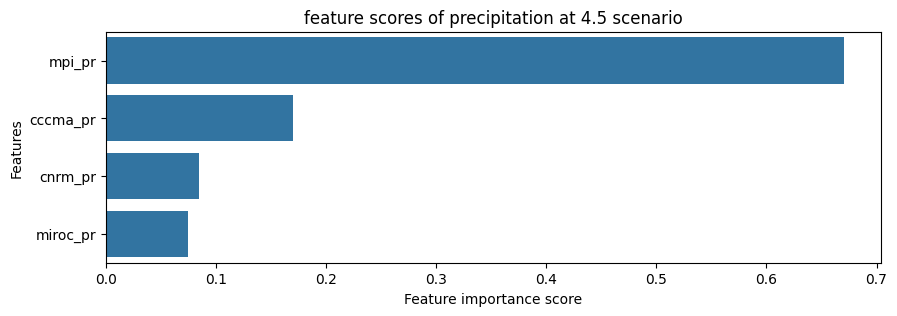

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%m/%d/%Y')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_pr  predicted_pr
Date                                 
2015-03-01       4.0075      4.050200
2015-03-02       3.9750      4.133975
2015-03-03       4.4550      4.658450
2015-03-04       3.7325      3.860875
2015-03-05       5.3775      5.946925

<Axes: xlabel='Date'>

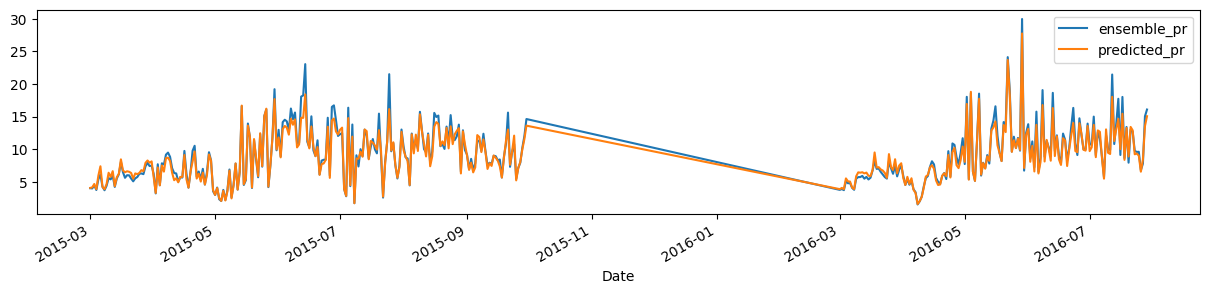

In [ ]:
df_pred[['ensemble_pr','predicted_pr']][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.6556084234405454
MSE is 1.2850818067533363
RMSE is 1.1336144877132333
R2 is 0.9427974955368645


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.009, test: 1.285


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
data_train

Date   tmax  cnrm_dm_tmax  cccma_dm_tmax  miroc_dm_tmax  \
0     2015-01-01  23.68         26.75          26.01          27.45   
1     2015-01-02  23.70         26.89          26.05          29.05   
2     2015-01-03  23.90         25.03          25.91          28.87   
3     2015-01-04  23.80         23.58          26.05          28.49   
4     2015-01-05  24.09         25.29          25.93          29.39   
...          ...    ...           ...            ...            ...   
24467 2081-12-27    NaN         26.82          25.95          20.35   
24468 2081-12-28    NaN         27.07          25.84          21.37   
24469 2081-12-29    NaN         28.02          26.02          25.29   
24470 2081-12-30    NaN         27.47          25.68          22.63   
24471 2081-12-31    NaN         28.43          26.03          21.45   

       mpi_dm_tmax  ensemble_tmax  tmin  cnrm_dm_tmin  cccma_dm_tmin  \
0            27.66        26.9675  8.04         15.39          14.27   
1            26.89        27.2200  6.83         15.14          14.91   
2            27.32        26.7825  8.07         13.94          13.29   
3            27.58        26.4250  9.21         12.98          12.22   
4            27.76        27.0925  8.58         12.11          13.16   
...            ...            ...   ...           ...            ...   
24467        27.08        25.0500   NaN         10.70          10.86   
24468        27.27        25.3875   NaN         11.74          12.16   
24469        27.13        26.6150   NaN         13.00          12.14   
24470        27.06        25.7100   NaN         13.26          12.66   
24471        27.39        25.8250   NaN         12.01          14.32   

       miroc_dm_tmin  mpi_dm_tmin  ensemble_tmin  
0              11.56         9.97        12.7975  
1              12.03        10.49        13.1425  
2              13.17        10.91        12.8275  
3              13.25        10.68        12.2825  
4              12.40        11.07        12.1850  
...              ...          ...            ...  
24467          10.62        10.62        10.7000  
24468          10.15        11.44        11.3725  
24469          12.27        12.02        12.3575  
24470          13.42        12.07        12.8525  
24471          13.32        12.93        13.1450  

[24472 rows x 13 columns]

In [ ]:
X_train = data_train[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-204-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_dm_tmax      0.590682
cnrm_dm_tmax     0.244585
miroc_dm_tmax    0.087492
cccma_dm_tmax    0.077241
dtype: float64

<ipython-input-206-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


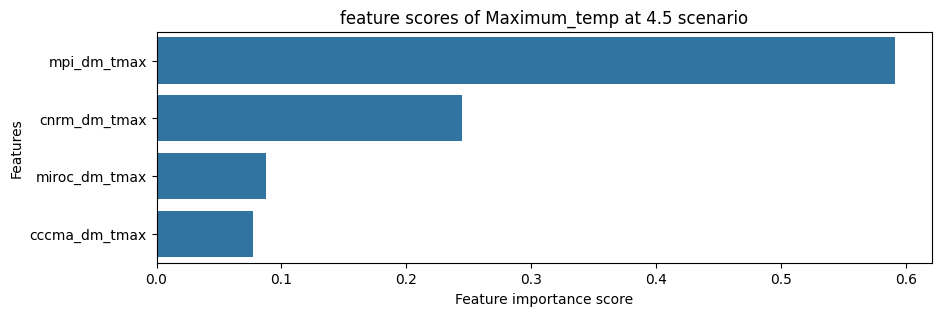

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmax  predicted_tmax
Date                                     
2082-01-01        27.1775       27.301750
2082-01-02        27.9300       27.863750
2082-01-03        27.2425       27.356625
2082-01-04        25.1300       25.253725
2082-01-05        27.2425       27.182550

In [ ]:
df_pred.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45RFTmax.csv')

<Axes: xlabel='Date'>

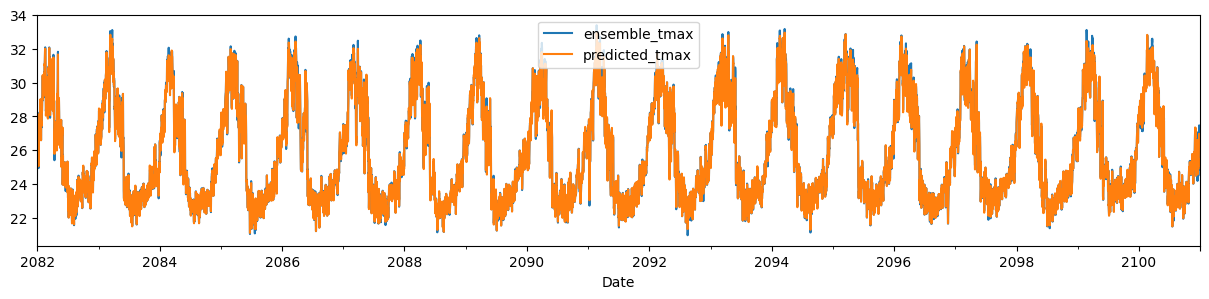

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.07880767521688992
MSE is 0.017603408908944598
RMSE is 0.13267783880115247
R2 is 0.9979821988654336


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.002, test: 0.018


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-215-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_dm_tmin     0.524250
cccma_dm_tmin    0.173558
miroc_dm_tmin    0.169186
mpi_dm_tmin      0.133006
dtype: float64

<ipython-input-217-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


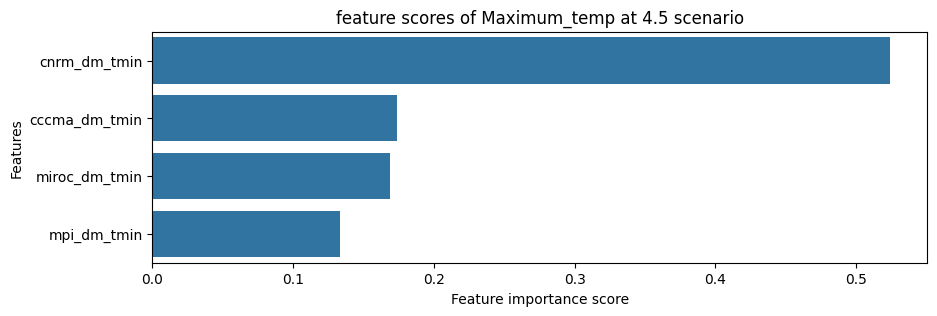

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmin  predicted_tmin
Date                                     
2082-01-01        14.2725       14.246925
2082-01-02        14.6150       14.426525
2082-01-03        15.0900       15.066750
2082-01-04        14.9225       14.825125
2082-01-05        14.4250       14.442650

In [ ]:
df_pred.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45RFTmin.csv')

<Axes: xlabel='Date'>

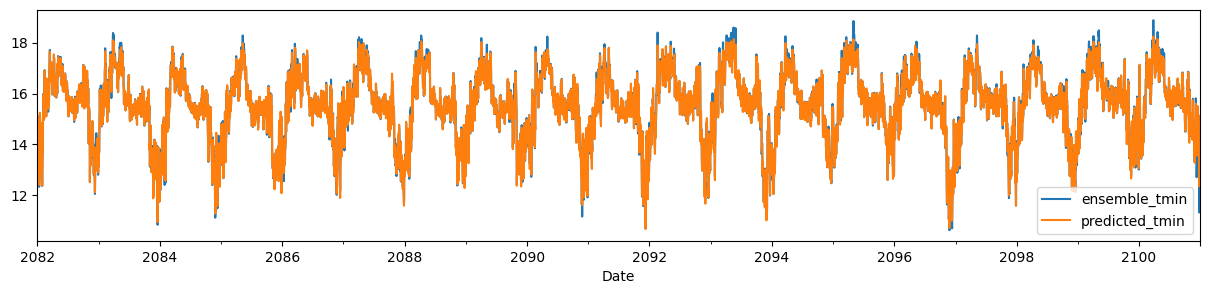

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.06430677811067878
MSE is 0.013178456394024592
RMSE is 0.11479745813398741
R2 is 0.992377084656152


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.001, test: 0.013


##### 8.5

In [ ]:
Ensemble2=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/tensemble85.csv')
Ensemble2['Date']=pd.to_datetime(Ensemble2.Date, format='%m/%d/%Y')
# Ensemble2=Ensemble2.set_index('Date')
# Ensemble2=Ensemble2.asfreq('d')
Ensemble2.head()

Date   tmax  cnrm_dm_tmax  cccma_dm_tmax  miroc_vs_tmax  mpi_dm_tmax  \
0 2015-01-01  23.68         26.63          25.77          25.91        19.21   
1 2015-01-02  23.70         26.85          25.84          26.43        19.91   
2 2015-01-03  23.90         24.68          26.11          27.50        19.07   
3 2015-01-04  23.80         23.78          26.03          27.27        22.85   
4 2015-01-05  24.09         24.98          26.03          26.69        19.63   

   ensemble_tmax  tmin  cnrm_dm_tmin  cccma_dm_tmin  miroc_vs_tmin  \
0        24.3800  8.04         15.34          14.54          13.58   
1        24.7575  6.83         14.12          15.32          14.72   
2        24.3400  8.07         13.03          14.11          14.59   
3        24.9825  9.21         12.20          12.67          14.35   
4        24.3325  8.58         12.93          13.04          14.54   

   mp[i_dm_tmin  ensemble_tmin  Unnamed: 13  Unnamed: 14  
0          6.53        12.4975          NaN          NaN  
1          4.35        12.1275          NaN          NaN  
2          2.13        10.9650          NaN          NaN  
3          4.30        10.8800          NaN          NaN  
4          5.80        11.5775          NaN          NaN

In [ ]:
Ensemble2.isnull().sum()

Date                 0
tmax             28429
cnrm_dm_tmax         0
cccma_dm_tmax       21
miroc_vs_tmax        0
mpi_dm_tmax          0
ensemble_tmax        0
tmin             28429
cnrm_dm_tmin         0
cccma_dm_tmin       21
miroc_vs_tmin        0
mp[i_dm_tmin         0
ensemble_tmin        0
Unnamed: 13      31411
Unnamed: 14      31411
dtype: int64

In [ ]:
Ensemble2['cccma_dm_tmax'] = Ensemble2['cccma_dm_tmax'].interpolate()
Ensemble2['cccma_dm_tmin'] = Ensemble2['cccma_dm_tmin'].interpolate()

In [ ]:
data_train=Ensemble2.loc[Ensemble2.Date <= '2081-12-31']
data_test=Ensemble2.loc[Ensemble2.Date > '2081-12-31']

> <font color='orangered'>**Precipitation**

In [ ]:
data_train=meanEnsemble2.loc[meanEnsemble2.Date <= '2081-12-31']
data_test=meanEnsemble2.loc[meanEnsemble2.Date > '2081-12-31']

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
meanEnsemble2

Date    pr  cccma_pr  cnrm_pr  miroc_pr  mpi_pr  ensemble_pr
0        1/1/2015  3.60  0.690000     2.62      0.02    0.00     0.832500
1        1/2/2015  0.33  0.770000     2.73      0.02    0.00     0.880000
2        1/3/2015  0.29  0.390000     4.37      0.01    0.00     1.192500
3        1/4/2015  0.05  0.770000     4.46      0.02    0.00     1.312500
4        1/5/2015  0.00  0.290000     3.89      0.01    0.00     1.047500
...           ...   ...       ...      ...       ...     ...          ...
31406  12/27/2100   NaN  8.763006     0.00      0.00    0.00     0.000000
31407  12/28/2100   NaN  8.763123     0.00      0.08    0.00     0.026667
31408  12/29/2100   NaN  8.763239     0.00      0.53    0.00     0.176667
31409  12/30/2100   NaN  8.763356     0.00      2.26    0.35     0.870000
31410  12/31/2100   NaN  8.763473     0.35     16.73    0.35     5.810000

[31411 rows x 7 columns]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-68-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_pr    0.540602
cnrm_pr     0.189425
mpi_pr      0.168081
miroc_pr    0.101892
dtype: float64

<ipython-input-70-ab67d6bc26fa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


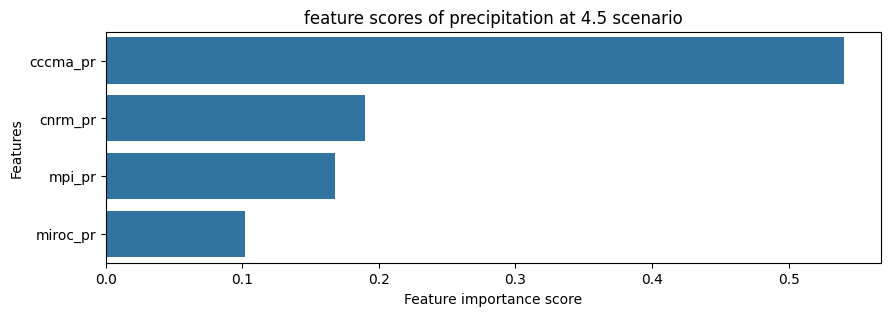

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%m/%d/%Y')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_pr  predicted_pr
Date                                 
2015-03-01       3.3775      3.527975
2015-03-02       2.9875      3.025725
2015-03-03       2.2325      2.207550
2015-03-04       1.7450      1.777075
2015-03-05       1.5150      1.515225

<Axes: xlabel='Date'>

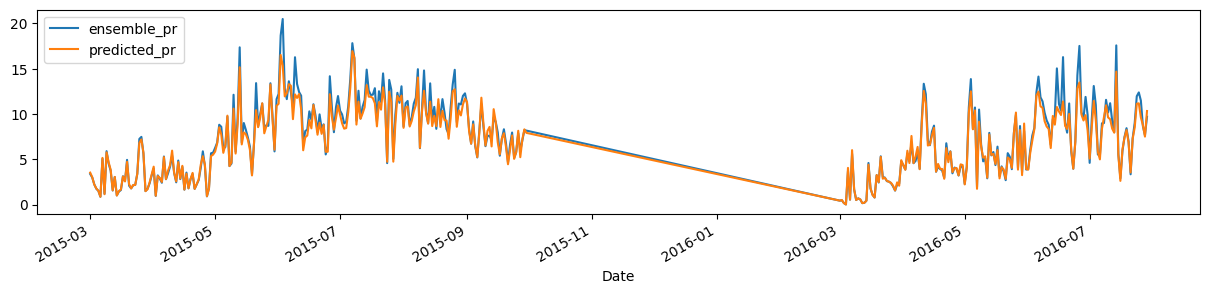

In [ ]:
df_pred[['ensemble_pr','predicted_pr']][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.5730627019488553
MSE is 1.1321482377744547
RMSE is 1.0640245475431733
R2 is 0.9356707397755071


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.011, test: 1.132


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
data_train.columns

Index(['Date', 'tmax', 'cnrm_dm_tmax', 'cccma_dm_tmax', 'miroc_vs_tmax',
       'mpi_dm_tmax', 'ensemble_tmax', 'tmin', 'cnrm_dm_tmin', 'cccma_dm_tmin',
       'miroc_vs_tmin', 'mp[i_dm_tmin', 'ensemble_tmin', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [ ]:
X_train = data_train[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
X_test.describe()

cnrm_dm_tmax  miroc_vs_tmax  cccma_dm_tmax  mpi_dm_tmax
count   6939.000000    6939.000000    6939.000000  6939.000000
mean      28.334241      28.691572      27.264968    25.787211
std        4.072388       3.298466       3.341265     3.763240
min       19.360000      21.720000      20.330000     1.880000
25%       25.130000      25.910000      24.610000    23.290000
50%       27.220000      28.010000      26.820000    25.120000
75%       31.280000      31.220000      29.680000    28.320000
max       40.970000      38.790000      38.420000    40.820000

In [ ]:
#fill those inf with some value
# value = X_test['mpi_tmax'].quantile(0.98)
# X_test = X_test.replace(np.inf, value)

In [ ]:
#This removes the rows that contain infinity or NaN values
#X_test=X_test[np.isfinite(X_test).all(1)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-154-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_dm_tmax     0.628486
cccma_dm_tmax    0.152600
mpi_dm_tmax      0.130490
miroc_vs_tmax    0.088424
dtype: float64

<ipython-input-156-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


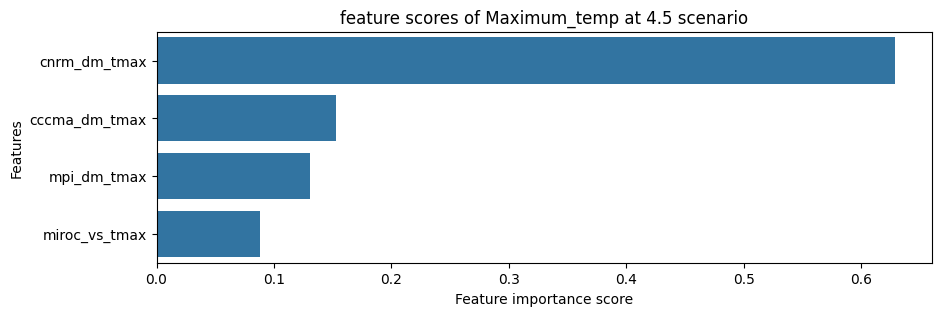

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmax  predicted_tmax
Date                                     
2082-01-01        29.3675       29.134100
2082-01-02        27.9525       27.936750
2082-01-03        26.8400       26.953350
2082-01-04        28.2975       28.285375
2082-01-05        28.5625       28.594500

<Axes: xlabel='Date'>

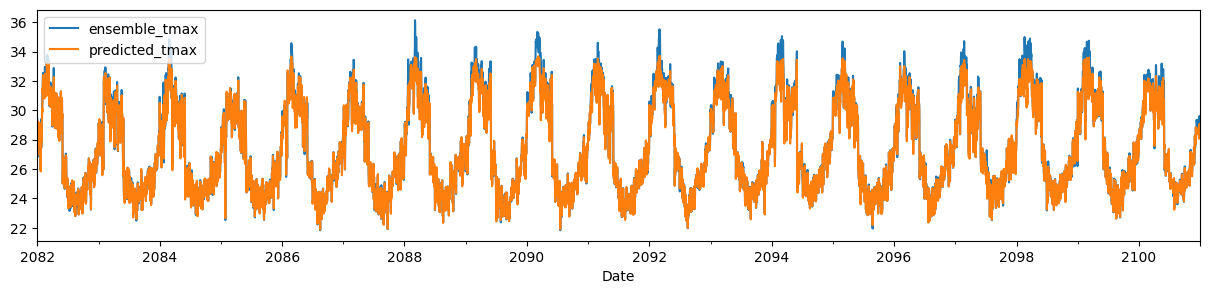

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.16309640798385924
MSE is 0.10016413265558848
RMSE is 0.31648717613133787
R2 is 0.9896613115431401


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.003, test: 0.100


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
X_test.describe()

cnrm_dm_tmin  miroc_vs_tmin  cccma_dm_tmin  mp[i_dm_tmin
count       6939.00    6939.000000        6939.00   6939.000000
mean            inf      15.877706            inf     10.059498
std             NaN       1.779014            NaN      4.236170
min           11.20       7.260000           9.94     -6.170000
25%           16.28      15.130000          17.79      7.110000
50%           17.27      16.030000          18.65     11.720000
75%           18.50      17.020000          19.49     13.480000
max             inf      20.010000            inf     17.320000

In [ ]:
#fill those inf with some value
value = X_test.quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel = RandomForestRegressor()
rfmodel.fit(X_train, y_train)

<ipython-input-167-2d03af3fa59c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfmodel.fit(X_train, y_train)


RandomForestRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mp[i_dm_tmin     0.831917
cnrm_dm_tmin     0.067449
cccma_dm_tmin    0.062890
miroc_vs_tmin    0.037744
dtype: float64

<ipython-input-170-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


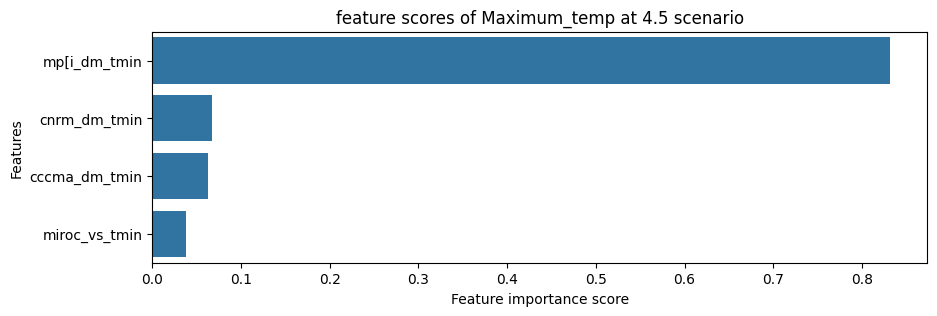

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = rfmodel.predict(X_train)
Y_test_pred = rfmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmin  predicted_tmin
Date                                     
2082-01-01        13.7400       13.777375
2082-01-02        14.4475       14.439000
2082-01-03        13.8650       13.895700
2082-01-04        13.5325       13.560900
2082-01-05        13.6500       13.671375

In [ ]:
# df_pred.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45RFTmin.csv')

<Axes: xlabel='Date'>

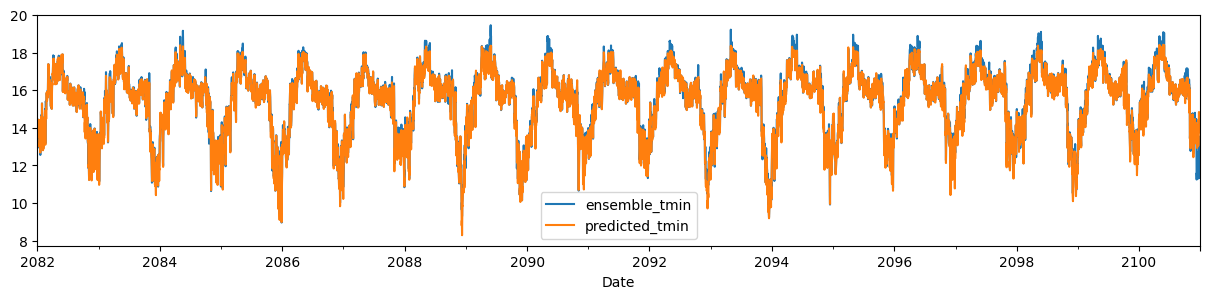

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.1266791144279443
MSE is 0.049036738535573464
RMSE is 0.2214424045560684
R2 is 0.984002928519995


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.001, test: 0.049


#### **ET**

##### 4.5

In [ ]:
Ensemble=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/4.5Ensemble.csv')
Ensemble['Year']=pd.to_datetime(Ensemble.Year, format='%m/%d/%Y')
Ensemble.tail()

Year  station_id  cnrm_pr  miroc_pr  cccma_pr  mpi_pr  \
131483 2099-12-27           3      0.0       0.0      0.00    8.07   
131484 2099-12-28           3      0.0       0.0      0.00    0.00   
131485 2099-12-29           3      0.0       0.0      0.00    0.00   
131486 2099-12-30           3      0.0       0.0      0.00    0.00   
131487 2099-12-31           3      0.0       0.0      7.18    0.00   

        ensemble_pr  cnrm_tmax  miroc_tmax  cccma_tmax  mpi_tmax  \
131483       2.0175      28.33       26.75       27.48     26.00   
131484       0.0000      28.30       26.87       27.50     26.61   
131485       0.0000      28.54       26.95       26.91     26.50   
131486       0.0000      28.37       26.67       24.96     26.32   
131487       1.7950      27.32       26.68       25.98     27.32   

        ensemble_tmax  cnrm_tmin  miroc_tmin  cccma_tmin  mpi_tmin  \
131483         27.140       9.01       11.29        8.61      9.84   
131484         27.320       9.40       13.36        8.80      8.48   
131485         27.225       9.74       15.90       10.02      8.47   
131486         26.580      10.90       11.90        9.67      8.52   
131487         26.825      10.28       12.80        9.61      8.70   

        ensemble_tmin  
131483         9.6875  
131484        10.0100  
131485        11.0325  
131486        10.2475  
131487        10.3475

In [ ]:
data_train=Ensemble.loc[Ensemble.Year <= '2081-12-31']
data_test=Ensemble.loc[Ensemble.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
dtmodel = ExtraTreesRegressor()
dtmodel.fit(X_train, y_train)

<ipython-input-27-f69d81e900f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_pr      0.670441
cccma_pr    0.170252
cnrm_pr     0.084980
miroc_pr    0.074327
dtype: float64

<ipython-input-29-ab67d6bc26fa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


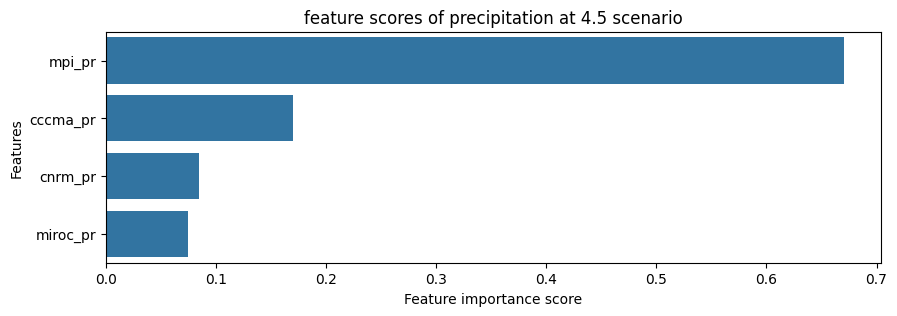

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = dtmodel.predict(X_train)
Y_test_pred = dtmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%m/%d/%Y')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_pr  predicted_pr
Date                                 
2015-03-01       4.0075      3.316100
2015-03-02       3.9750      3.535950
2015-03-03       4.4550      3.752000
2015-03-04       3.7325      3.024900
2015-03-05       5.3775      5.684775

<Axes: xlabel='Date'>

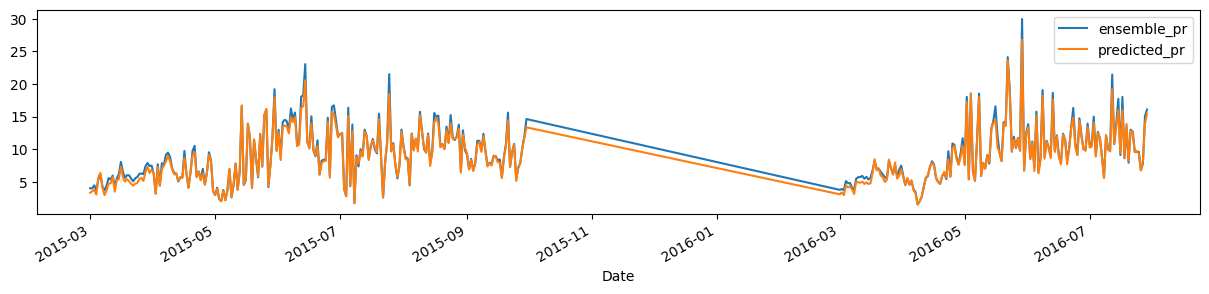

In [ ]:
df_pred[['ensemble_pr','predicted_pr']][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.40954811272897634
MSE is 0.5716793646239915
RMSE is 0.7560948119277049
R2 is 0.9745529885844355


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.572


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
dtmodel = ExtraTreesRegressor()
dtmodel.fit(X_train, y_train)

<ipython-input-227-f69d81e900f7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dtmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
feature_scores = pd.Series(rfmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_dm_tmax     0.524250
cccma_dm_tmax    0.173558
miroc_dm_tmax    0.169186
mpi_dm_tmax      0.133006
dtype: float64

<ipython-input-229-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


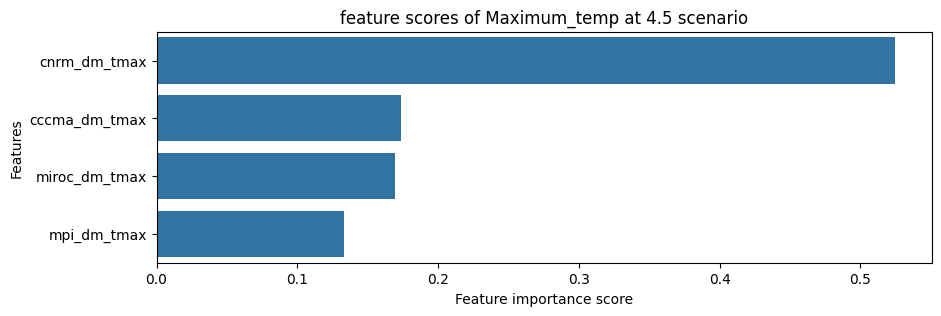

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = dtmodel.predict(X_train)
Y_test_pred = dtmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmax  predicted_tmax
Date                                     
2082-01-01        27.1775       27.259650
2082-01-02        27.9300       27.915150
2082-01-03        27.2425       27.302925
2082-01-04        25.1300       25.205400
2082-01-05        27.2425       27.225950

In [ ]:
df_pred.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45ETTmax.csv')

<Axes: xlabel='Date'>

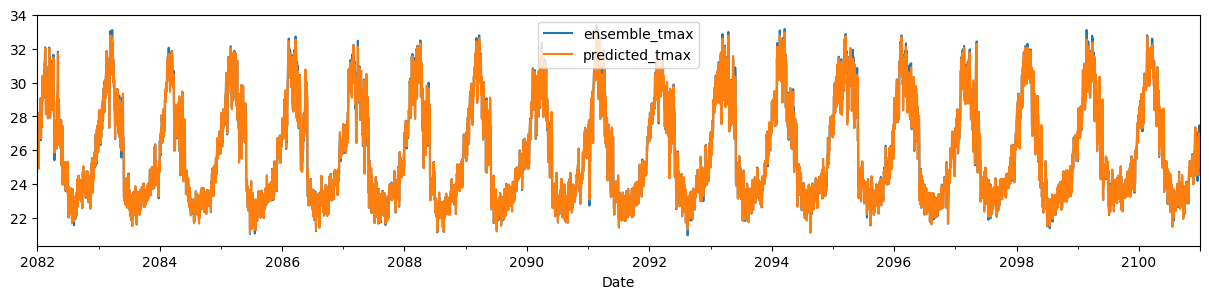

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.0498067745107364
MSE is 0.008515025017794131
RMSE is 0.0922768931953939
R2 is 0.9990239602323254


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.009


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-239-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)
feature_scores

cnrm_dm_tmin     0.288626
mpi_dm_tmin      0.248233
miroc_dm_tmin    0.248019
cccma_dm_tmin    0.215121
dtype: float64

<ipython-input-241-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


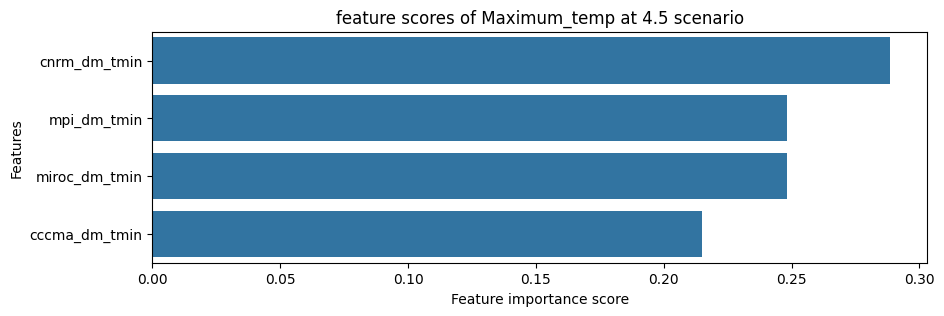

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmin  predicted_tmin
Date                                     
2082-01-01        14.2725       14.273550
2082-01-02        14.6150       14.593150
2082-01-03        15.0900       15.122800
2082-01-04        14.9225       14.870350
2082-01-05        14.4250       14.415725

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45ETTmin.csv')

<Axes: xlabel='Date'>

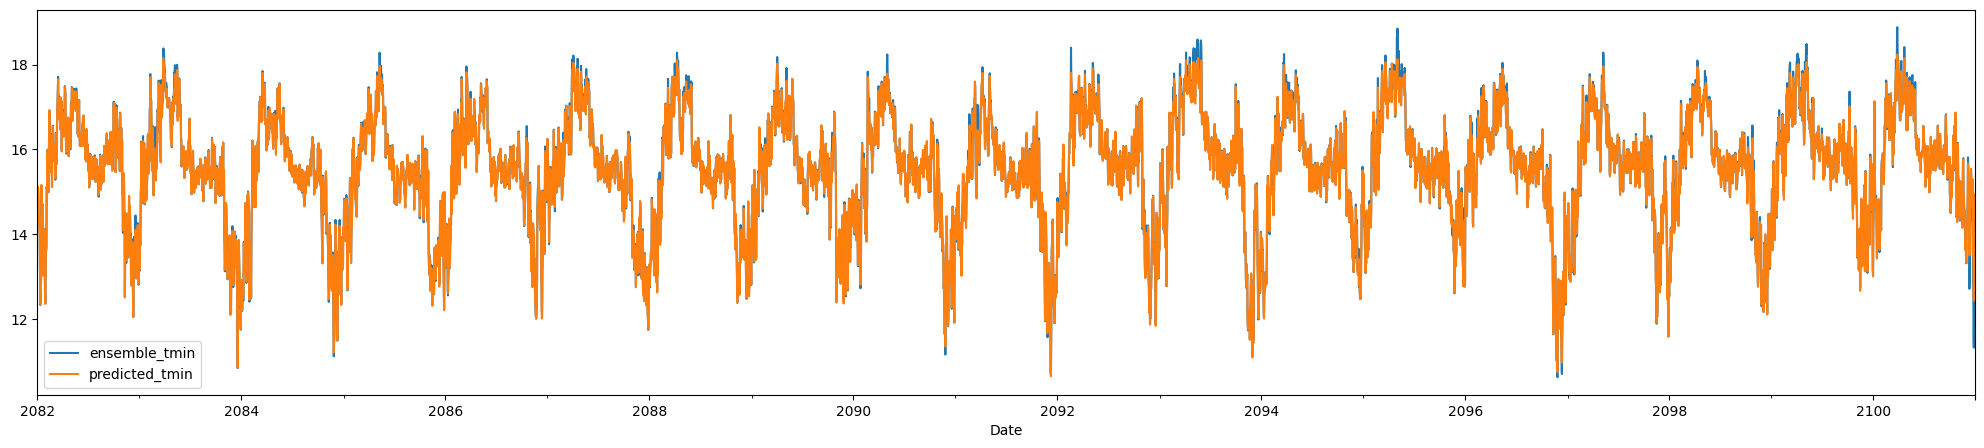

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].plot(figsize=(25, 5))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.03749298289522998
MSE is 0.006309882310502974
RMSE is 0.07943476764303509
R2 is 0.9963501265061349


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.000, test: 0.006


##### 8.5

In [ ]:
Ensemble2=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/8.5Ensemble.csv')
Ensemble2['Year']=pd.to_datetime(Ensemble2.Year, format='%m/%d/%Y')
Ensemble2.head()

Year  station_id  cnrm_pr  miroc_pr  cccma_pr  mpi_pr  ensemble_pr  \
0 2010-01-01           0     0.84      5.47      5.40     0.0       2.9275   
1 2010-01-02           0     0.84      6.16      0.00     0.0       1.7500   
2 2010-01-03           0     0.84      6.12      5.59     0.0       3.1375   
3 2010-01-04           0     0.84      6.40      7.16     0.0       3.6000   
4 2010-01-05           0     0.84      5.13      0.00     0.0       1.4925   

   cnrm_tmax  miroc_tmax  cccma_tmax  mpi_tmax  ensemble_tmax  cnrm_tmin  \
0      23.03       24.75       22.28     20.69        22.6875      13.52   
1      22.35       21.38       26.53     21.05        22.8275      12.86   
2      23.23       21.35       25.82     16.26        21.6650      12.11   
3      25.05       22.55       19.85     21.46        22.2275      11.94   
4      26.40       25.07       26.96     21.47        24.9750      13.26   

   miroc_tmin  cccma_tmin  mpi_tmin  ensemble_tmin  
0       14.95       10.68     11.57        12.6800  
1       13.99        9.93     11.94        12.1800  
2       13.92       13.18     12.84        13.0125  
3       14.62       12.54     11.53        12.6575  
4       14.50       11.16     10.66        12.3950

In [ ]:
data_train=Ensemble2.loc[Ensemble2.Year <= '2081-12-31']
data_test=Ensemble2.loc[Ensemble2.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-77-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_pr    0.422790
cnrm_pr     0.233406
mpi_pr      0.225678
miroc_pr    0.118125
dtype: float64

<ipython-input-79-ab67d6bc26fa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


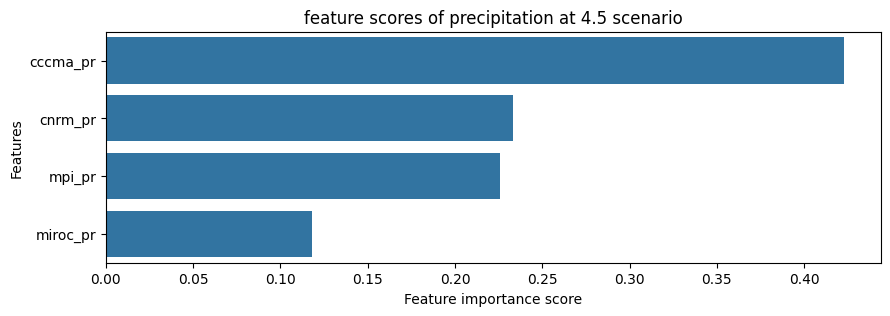

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred['predicted_pr']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%m/%d/%Y')
# df_pred['station_id'] = data_test['station_id']
# df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_pr','predicted_pr']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_pr  predicted_pr
Date                                 
2015-03-01       3.3775      3.401675
2015-03-02       2.9875      2.945275
2015-03-03       2.2325      2.221850
2015-03-04       1.7450      1.719625
2015-03-05       1.5150      1.522050

<Axes: xlabel='Date'>

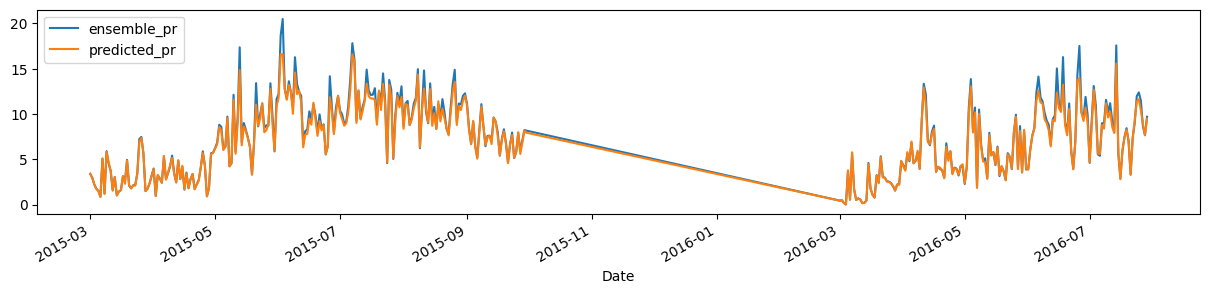

In [ ]:
df_pred[['ensemble_pr','predicted_pr']][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.41265036405131483
MSE is 0.7611996249064561
RMSE is 0.8724675494862008
R2 is 0.9567482356818815


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.761


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
X_test.describe()

cnrm_dm_tmax  miroc_vs_tmax  cccma_dm_tmax  mpi_dm_tmax
count   6939.000000    6939.000000    6939.000000  6939.000000
mean      28.334241      28.691572      27.264968    25.787211
std        4.072388       3.298466       3.341265     3.763240
min       19.360000      21.720000      20.330000     1.880000
25%       25.130000      25.910000      24.610000    23.290000
50%       27.220000      28.010000      26.820000    25.120000
75%       31.280000      31.220000      29.680000    28.320000
max       40.970000      38.790000      38.420000    40.820000

In [ ]:
#fill those inf with some value
# value = X_test['mpi_tmax'].quantile(0.98)
# X_test = X_test.replace(np.inf, value)

In [ ]:
#This removes the rows that contain infinity or NaN values
#X_test=X_test[np.isfinite(X_test).all(1)]

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-118-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_dm_tmax     0.362983
miroc_vs_tmax    0.281102
cccma_dm_tmax    0.223223
mpi_dm_tmax      0.132692
dtype: float64

<ipython-input-120-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


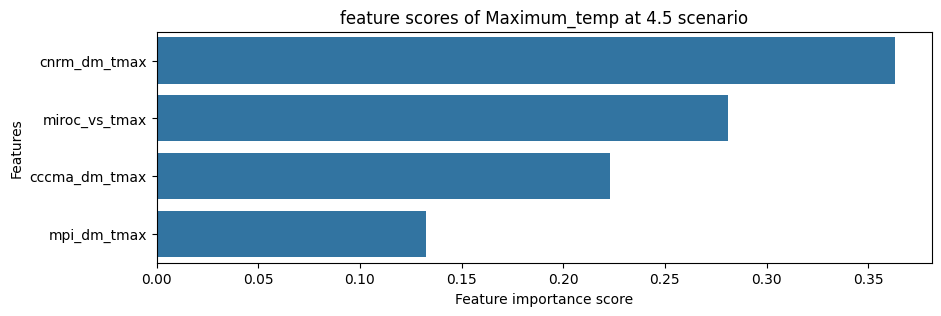

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_pred['predicted_tmax']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmax','predicted_tmax']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmax  predicted_tmax
Date                                     
2082-01-01        29.3675       29.315250
2082-01-02        27.9525       27.978175
2082-01-03        26.8400       26.923225
2082-01-04        28.2975       28.266125
2082-01-05        28.5625       28.509350

<Axes: xlabel='Date'>

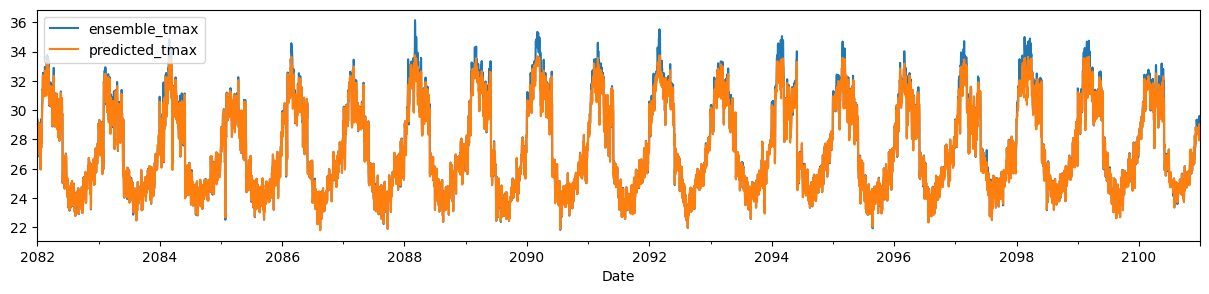

In [ ]:
df_pred[['ensemble_tmax','predicted_tmax']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.11863756304943077
MSE is 0.07154044881414677
RMSE is 0.26747046344250197
R2 is 0.9926157757997405


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.000, test: 0.072


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
#fill those inf with some value
value = X_test.quantile(0.98)
X_test = X_test.replace(np.inf, value)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)

<ipython-input-136-7487cf28f784>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  etmodel.fit(X_train, y_train)


ExtraTreesRegressor()

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
feature_scores = pd.Series(etmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mp[i_dm_tmin     0.546505
miroc_vs_tmin    0.187165
cnrm_dm_tmin     0.169202
cccma_dm_tmin    0.097128
dtype: float64

<ipython-input-138-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


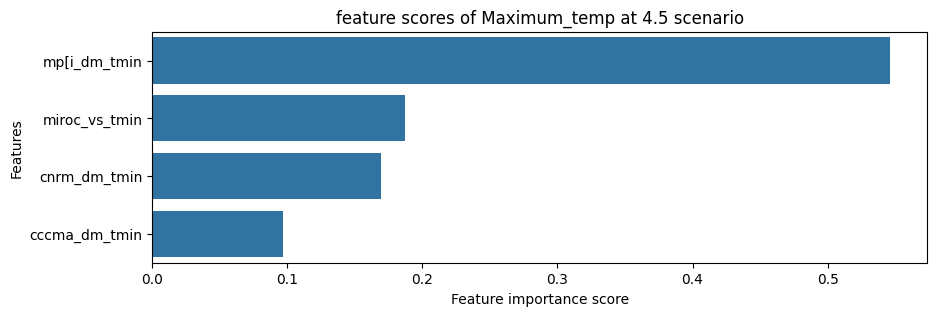

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = etmodel.predict(X_train)
Y_test_pred = etmodel.predict(X_test)

In [ ]:
df_pred = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred['predicted_tmin']= Y_test_pred
df_pred['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred=df_pred[['Date','ensemble_tmin','predicted_tmin']]
df_pred = df_pred.set_index('Date')
df_pred.head()

ensemble_tmin  predicted_tmin
Date                                     
2082-01-01        13.7400       13.774575
2082-01-02        14.4475       14.478375
2082-01-03        13.8650       13.882575
2082-01-04        13.5325       13.547525
2082-01-05        13.6500       13.657175

<Axes: xlabel='Date'>

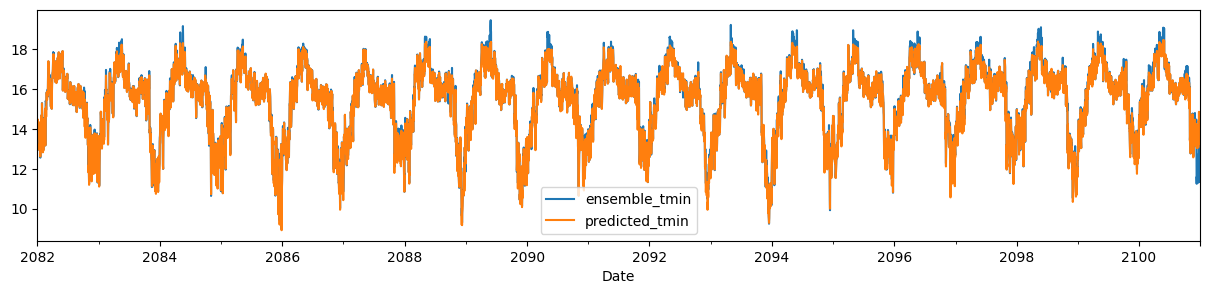

In [ ]:
df_pred[['ensemble_tmin','predicted_tmin']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.08850828649884779
MSE is 0.031768296678540496
RMSE is 0.17823663113552302
R2 is 0.9896363476050524


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.000, test: 0.032


#### **CB**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 4.6 MB/s eta 0:00:00


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

##### 4.5

In [ ]:
Ensemble=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/4.5Ensemble.csv')
Ensemble['Year']=pd.to_datetime(Ensemble.Year, format='%m/%d/%Y')
Ensemble.tail()

Year  station_id  cnrm_pr  miroc_pr  cccma_pr  mpi_pr  \
131483 2099-12-27           3      0.0       0.0      0.00    8.07   
131484 2099-12-28           3      0.0       0.0      0.00    0.00   
131485 2099-12-29           3      0.0       0.0      0.00    0.00   
131486 2099-12-30           3      0.0       0.0      0.00    0.00   
131487 2099-12-31           3      0.0       0.0      7.18    0.00   

        ensemble_pr  cnrm_tmax  miroc_tmax  cccma_tmax  mpi_tmax  \
131483       2.0175      28.33       26.75       27.48     26.00   
131484       0.0000      28.30       26.87       27.50     26.61   
131485       0.0000      28.54       26.95       26.91     26.50   
131486       0.0000      28.37       26.67       24.96     26.32   
131487       1.7950      27.32       26.68       25.98     27.32   

        ensemble_tmax  cnrm_tmin  miroc_tmin  cccma_tmin  mpi_tmin  \
131483         27.140       9.01       11.29        8.61      9.84   
131484         27.320       9.40       13.36        8.80      8.48   
131485         27.225       9.74       15.90       10.02      8.47   
131486         26.580      10.90       11.90        9.67      8.52   
131487         26.825      10.28       12.80        9.61      8.70   

        ensemble_tmin  
131483         9.6875  
131484        10.0100  
131485        11.0325  
131486        10.2475  
131487        10.3475

In [ ]:
data_train=Ensemble.loc[Ensemble.Year <= '2081-12-31']
data_test=Ensemble.loc[Ensemble.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.061407
0:	learn: 3.3483333	total: 57.1ms	remaining: 57.1s
1:	learn: 3.1801876	total: 62.9ms	remaining: 31.4s
2:	learn: 3.0247560	total: 66.3ms	remaining: 22s
3:	learn: 2.8759452	total: 70.2ms	remaining: 17.5s
4:	learn: 2.7346214	total: 73.8ms	remaining: 14.7s
5:	learn: 2.6032313	total: 77.2ms	remaining: 12.8s
6:	learn: 2.4807912	total: 81.4ms	remaining: 11.5s
7:	learn: 2.3633703	total: 83.8ms	remaining: 10.4s
8:	learn: 2.2527489	total: 87.8ms	remaining: 9.67s
9:	learn: 2.1503838	total: 90.3ms	remaining: 8.94s
10:	learn: 2.0526080	total: 93.3ms	remaining: 8.39s
11:	learn: 1.9591944	total: 96.7ms	remaining: 7.96s
12:	learn: 1.8722344	total: 101ms	remaining: 7.64s
13:	learn: 1.7868715	total: 104ms	remaining: 7.3s
14:	learn: 1.7088211	total: 109ms	remaining: 7.13s
15:	learn: 1.6380529	total: 112ms	remaining: 6.88s
16:	learn: 1.5684442	total: 116ms	remaining: 6.72s
17:	learn: 1.5000215	total: 127ms	remaining: 6.94s
18:	learn: 1.4382773	total: 132ms	remaining: 6.81s
19

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_pr      39.323129
cccma_pr    24.024057
miroc_pr    18.935792
cnrm_pr     17.717022
dtype: float64

<ipython-input-40-ab67d6bc26fa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


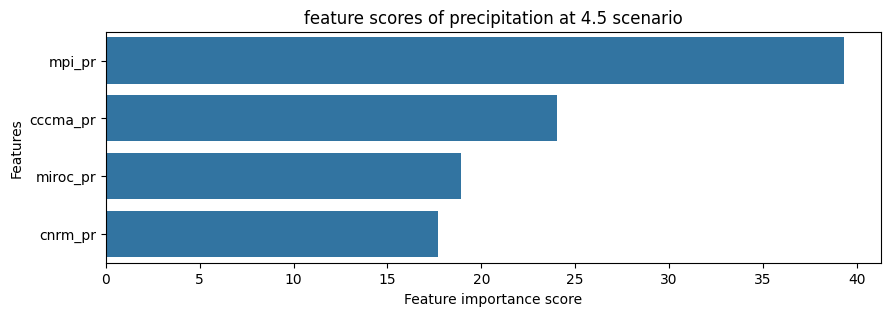

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_pred1 = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred1['predicted_pr']= Y_test_pred
df_pred1['Date'] = pd.to_datetime(data_test.Date, format='%m/%d/%Y')
# df_pred1['station_id'] = data_test['station_id']
#df_pred = df_pred.reset_index()
df_pred1=df_pred1[['Date','ensemble_pr','predicted_pr']]
# df_pred1 = df_pred1.set_index('Date')
df_pred1.head()

Date  ensemble_pr  predicted_pr
59 2015-03-01       4.0075      3.796467
60 2015-03-02       3.9750      3.845055
61 2015-03-03       4.4550      4.164148
62 2015-03-04       3.7325      3.509210
63 2015-03-05       5.3775      5.092747

In [ ]:
df_pred1.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45PrecipPredictedEnsemble.csv')

In [ ]:
# df_pred1['Date']=pd.to_datetime(df_pred1.Date, format='%Y/%m/%d')
df_pred1['Year']=df_pred1['Date'].dt.year
df_pred1['Month']=df_pred1['Date'].dt.month
df_pred1

Date  ensemble_pr  predicted_pr  Year  Month
59    2015-03-01       4.0075      3.796467  2015      3
60    2015-03-02       3.9750      3.845055  2015      3
61    2015-03-03       4.4550      4.164148  2015      3
62    2015-03-04       3.7325      3.509210  2015      3
63    2015-03-05       5.3775      5.092747  2015      3
...          ...          ...           ...   ...    ...
31314 2100-09-26       5.7025      5.553629  2100      9
31315 2100-09-27       8.5675      8.498525  2100      9
31316 2100-09-28       8.1600      8.097665  2100      9
31317 2100-09-29      11.9700     11.774756  2100      9
31318 2100-09-30      12.5200     12.481677  2100      9

[18404 rows x 5 columns]

In [ ]:
m=[]
for i in ((df_pred1.Year).unique()):
    y=df_pred1['ensemble_pr'].loc[df_pred1.Year==i].mean(),df_pred1['predicted_pr'].loc[df_pred1.Year==i].mean()
    m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_pr','predicted_pr']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Year'] = df_pred1.Year.unique()
df = df[['Year','ensemble_pr','predicted_pr']]
df

Year ensemble_pr predicted_pr
0   2015    9.006425     9.071209
1   2016    9.516986     9.492637
2   2017    8.845117     8.793654
3   2018    8.785444     8.850873
4   2019   10.041741    10.092867
..   ...         ...          ...
81  2096    9.974194    10.029022
82  2097    9.794708     9.781370
83  2098   10.344252    10.240290
84  2099    9.613820     9.579855
85  2100    9.342301     9.308552

[86 rows x 3 columns]

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/annualCBPredictedSSP45P.csv', index=False)

In [ ]:
m=[]

#mordervation
for i in range(1,13):
  y=df_pred1['ensemble_pr'].loc[df_pred1.Month == i].mean(), df_pred1['predicted_pr'].loc[df_pred1.Month == i].mean()
  m.append(y)

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/MonthPredictedEnsemble.csv')

In [ ]:
df_pred4['month'] = pd.DatetimeIndex(df_pred4.index).month

<Axes: xlabel='Date'>

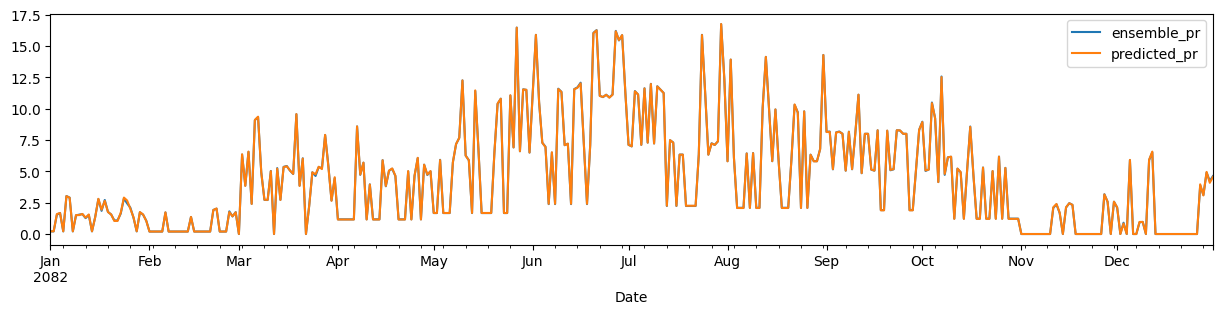

In [ ]:
df_pred1[['ensemble_pr','predicted_pr']].loc[df_pred1.station_id == 0][:365].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.29975915172449025
MSE is 0.6969136383209775
RMSE is 0.8348135350609605
R2 is 0.9689784686881591


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.003, test: 0.697


> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
X_train = data_train[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.067856
0:	learn: 2.7184227	total: 63.7ms	remaining: 1m 3s
1:	learn: 2.5499983	total: 76.6ms	remaining: 38.2s
2:	learn: 2.3927032	total: 86.6ms	remaining: 28.8s
3:	learn: 2.2474927	total: 111ms	remaining: 27.5s
4:	learn: 2.1116708	total: 133ms	remaining: 26.6s
5:	learn: 1.9842472	total: 151ms	remaining: 25s
6:	learn: 1.8664982	total: 175ms	remaining: 24.9s
7:	learn: 1.7565368	total: 211ms	remaining: 26.2s
8:	learn: 1.6529828	total: 243ms	remaining: 26.8s
9:	learn: 1.5578049	total: 282ms	remaining: 27.9s
10:	learn: 1.4684400	total: 311ms	remaining: 28s
11:	learn: 1.3830114	total: 343ms	remaining: 28.3s
12:	learn: 1.3039005	total: 365ms	remaining: 27.7s
13:	learn: 1.2304481	total: 396ms	remaining: 27.9s
14:	learn: 1.1610981	total: 415ms	remaining: 27.2s
15:	learn: 1.0949194	total: 438ms	remaining: 26.9s
16:	learn: 1.0345936	total: 459ms	remaining: 26.5s
17:	learn: 0.9772542	total: 484ms	remaining: 26.4s
18:	learn: 0.9228991	total: 501ms	remaining: 25.9s
19:	learn: 0

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmax',	'miroc_dm_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cnrm_dm_tmax     26.678031
miroc_dm_tmax    26.087498
mpi_dm_tmax      25.039376
cccma_dm_tmax    22.195095
dtype: float64

<ipython-input-255-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


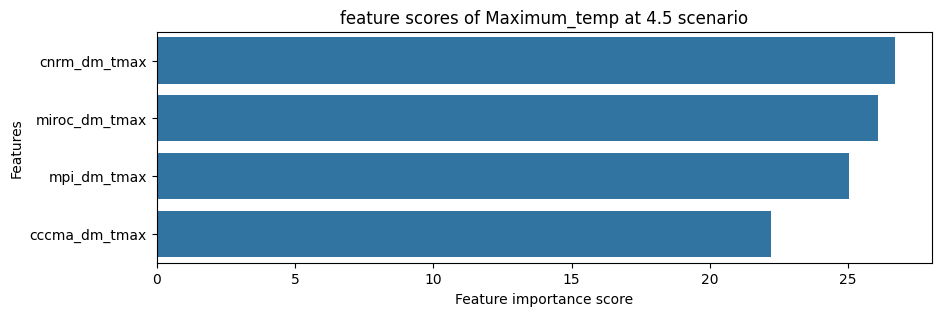

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_predt1 = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_predt1['predicted_tmax']= Y_test_pred
df_predt1['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_predt1['station_id'] = data_test['station_id']
#df_predt1 = df_predt1.reset_index()
df_predt1=df_predt1[['Date','ensemble_tmax','predicted_tmax']]
df_predt1 = df_predt1.set_index('Date')
df_predt1.head()

ensemble_tmax  predicted_tmax
Date                                     
2082-01-01        27.1775       27.143211
2082-01-02        27.9300       27.911286
2082-01-03        27.2425       27.235197
2082-01-04        25.1300       25.154508
2082-01-05        27.2425       27.208829

In [ ]:
df_predt1.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45CBTmax.csv')

In [ ]:
tdf = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45CBTmax.csv')

In [ ]:
tdf['Date']=pd.to_datetime(tdf.Date, format='%Y/%m/%d')
tdf['Year']=tdf['Date'].dt.year
tdf['Month']=tdf['Date'].dt.month
tdf

Date  ensemble_tmax  predicted_tmax  Year  Month
0    2082-01-01      27.177500       27.143211  2082      1
1    2082-01-02      27.930000       27.911286  2082      1
2    2082-01-03      27.242500       27.235197  2082      1
3    2082-01-04      25.130000       25.154508  2082      1
4    2082-01-05      27.242500       27.208829  2082      1
...         ...            ...             ...   ...    ...
6934 2100-12-27      27.476667       26.941117  2100     12
6935 2100-12-28      26.563333       26.323161  2100     12
6936 2100-12-29      26.960000       26.602133  2100     12
6937 2100-12-30      26.583333       26.340545  2100     12
6938 2100-12-31      26.870000       26.520115  2100     12

[6939 rows x 5 columns]

In [ ]:
m=[]
for i in ((tdf.Year).unique()):
    y=tdf['ensemble_tmax'].loc[tdf.Year==i].mean(),tdf['predicted_tmax'].loc[tdf.Year==i].mean()
    m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmax','predicted_tmax']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Year'] = tdf.Year.unique()
df = df[['Year','ensemble_tmax','predicted_tmax']]
df

Year ensemble_tmax predicted_tmax
0   2082     25.903685      25.900947
1   2083     25.813856      25.812722
2   2084     25.629850      25.629126
3   2085     25.836425      25.832331
4   2086     25.900274      25.897142
5   2087     25.701466      25.697649
6   2088     25.767937      25.770202
7   2089     25.797062      25.798294
8   2090     25.723562      25.719075
9   2091     25.570479      25.563196
10  2092     25.896407      25.894242
11  2093     26.351411      26.351243
12  2094     26.242616      26.239849
13  2095     26.446760      26.445234
14  2096     25.958484      25.952558
15  2097     25.919212      25.916923
16  2098     25.916507      25.908298
17  2099     26.274781      26.267139
18  2100     26.247954      26.243060

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/annualCBPredictedSSP4.5tmax.csv', index=False)

In [ ]:
m=[]

#mordervation
for i in range(1,13):
  y=tdf['ensemble_tmax'].loc[tdf.Month == i].mean(), tdf['predicted_tmax'].loc[tdf.Month == i].mean()
  m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmax','predicted_tmax']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Month'] = tdf.Month.unique()
df = df[['Month','ensemble_tmax','predicted_tmax']]
df

Month ensemble_tmax predicted_tmax
0      1     27.798765      27.796047
1      2     30.429426      30.428188
2      3     30.567322      30.548824
3      4     28.689443      28.682712
4      5     27.498638      27.496125
5      6     23.887851      23.888232
6      7     22.888387      22.888806
7      8     22.851952      22.851447
8      9     23.114789      23.114739
9     10     23.675531      23.672338
10    11     24.352855      24.352190
11    12     25.832310      25.830403

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/monthlyCBPredictedSSP4.5tmax.csv', index=False)

<Axes: xlabel='Date'>

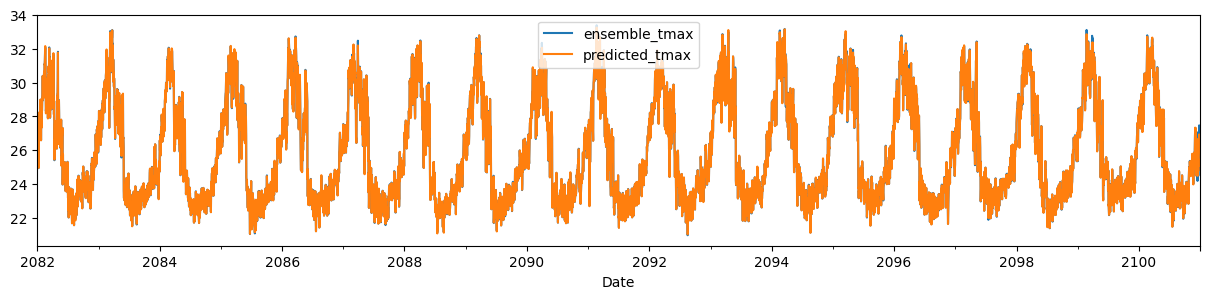

In [ ]:
df_predt1[['ensemble_tmax','predicted_tmax']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.02480489088515689
MSE is 0.001782721714815163
RMSE is 0.04222228931281632
R2 is 0.9997956544713937


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.001, test: 0.002


>> <font color='green'>**Tmin**

In [ ]:
X_train = data_train[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.067856
0:	learn: 1.4163242	total: 14.9ms	remaining: 14.9s
1:	learn: 1.3357735	total: 35ms	remaining: 17.5s
2:	learn: 1.2615061	total: 47.4ms	remaining: 15.8s
3:	learn: 1.1921144	total: 67.8ms	remaining: 16.9s
4:	learn: 1.1262362	total: 86.1ms	remaining: 17.1s
5:	learn: 1.0637855	total: 91.9ms	remaining: 15.2s
6:	learn: 1.0055948	total: 109ms	remaining: 15.5s
7:	learn: 0.9504980	total: 121ms	remaining: 15s
8:	learn: 0.8991597	total: 135ms	remaining: 14.8s
9:	learn: 0.8510951	total: 144ms	remaining: 14.2s
10:	learn: 0.8064480	total: 161ms	remaining: 14.5s
11:	learn: 0.7633982	total: 172ms	remaining: 14.2s
12:	learn: 0.7242828	total: 185ms	remaining: 14.1s
13:	learn: 0.6877572	total: 197ms	remaining: 13.9s
14:	learn: 0.6530501	total: 209ms	remaining: 13.7s
15:	learn: 0.6198106	total: 218ms	remaining: 13.4s
16:	learn: 0.5894516	total: 229ms	remaining: 13.2s
17:	learn: 0.5595816	total: 244ms	remaining: 13.3s
18:	learn: 0.5327839	total: 255ms	remaining: 13.2s
19:	learn

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmin',	'miroc_dm_tmin',	'cccma_dm_tmin',	'mpi_dm_tmin']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)
feature_scores

cnrm_dm_tmin     27.121115
mpi_dm_tmin      25.429719
miroc_dm_tmin    25.240570
cccma_dm_tmin    22.208596
dtype: float64

<ipython-input-269-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


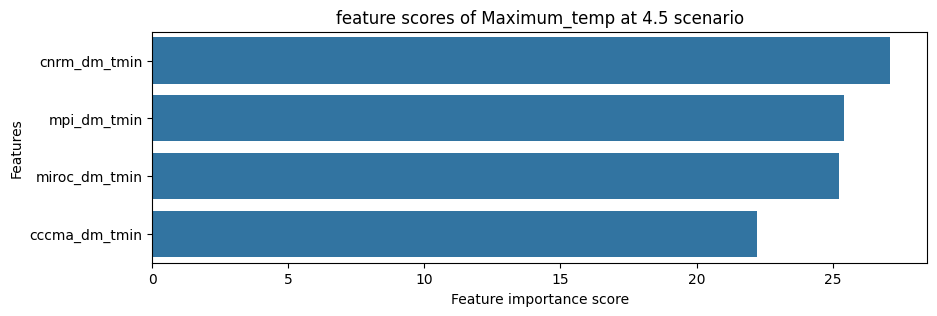

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_predt2 = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_predt2['predicted_tmin']= Y_test_pred
df_predt2['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_predt2['station_id'] = data_test['station_id']
#df_predt2 = df_predt2.reset_index()
df_predt2=df_predt2[['Date','ensemble_tmin','predicted_tmin']]
df_predt2 = df_predt2.set_index('Date')
df_predt2.head()

ensemble_tmin  predicted_tmin
Date                                     
2082-01-01        14.2725       14.282016
2082-01-02        14.6150       14.621543
2082-01-03        15.0900       15.098644
2082-01-04        14.9225       14.902015
2082-01-05        14.4250       14.411313

In [ ]:
df_pred.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45CBTmin.csv')

In [ ]:
tdf = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP45CBTmin.csv')

In [ ]:
tdf['Date']=pd.to_datetime(tdf.Date, format='%Y/%m/%d')
tdf['Year']=tdf['Date'].dt.year
tdf['Month']=tdf['Date'].dt.month
tdf

Date  ensemble_tmin  predicted_tmin  Year  Month
0    2082-01-01      14.272500       14.273550  2082      1
1    2082-01-02      14.615000       14.593150  2082      1
2    2082-01-03      15.090000       15.122800  2082      1
3    2082-01-04      14.922500       14.870350  2082      1
4    2082-01-05      14.425000       14.415725  2082      1
...         ...            ...             ...   ...    ...
6934 2100-12-27      11.326667       12.435675  2100     12
6935 2100-12-28      12.423333       13.230175  2100     12
6936 2100-12-29      14.140000       14.408050  2100     12
6937 2100-12-30      14.723333       14.943150  2100     12
6938 2100-12-31      13.776667       14.137200  2100     12

[6939 rows x 5 columns]

In [ ]:
m=[]
for i in ((tdf.Year).unique()):
    y=tdf['ensemble_tmin'].loc[tdf.Year==i].mean(),tdf['predicted_tmin'].loc[tdf.Year==i].mean()
    m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmin','predicted_tmin']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Year'] = tdf.Year.unique()
df = df[['Year','ensemble_tmin','predicted_tmin']]
df

Year ensemble_tmin predicted_tmin
0   2082     15.572082      15.563214
1   2083     15.560377      15.529005
2   2084     15.182828      15.174896
3   2085     15.315897      15.301655
4   2086     15.500740      15.486643
5   2087     15.575938      15.553982
6   2088     15.444836      15.412731
7   2089     15.462678      15.449605
8   2090     15.427596      15.411729
9   2091     15.234027      15.219646
10  2092     15.663798      15.641662
11  2093     15.769205      15.725766
12  2094     15.514151      15.493658
13  2095     15.793240      15.754916
14  2096     15.444488      15.421677
15  2097     15.502425      15.490335
16  2098     15.543336      15.517269
17  2099     15.881870      15.854809
18  2100     15.868354      15.875456

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/annualCBPredictedSSP4.5tmin.csv', index=False)

In [ ]:
m=[]

#mordervation
for i in range(1,13):
  y=tdf['ensemble_tmin'].loc[tdf.Month == i].mean(), tdf['predicted_tmin'].loc[tdf.Month == i].mean()
  m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmin','predicted_tmin']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Month'] = tdf.Month.unique()
df = df[['Month','ensemble_tmin','predicted_tmin']]
df

Month ensemble_tmin predicted_tmin
0      1     14.430798      14.421012
1      2     15.795140      15.753636
2      3     16.715518      16.674741
3      4     17.003482      16.965833
4      5     17.169571      17.093550
5      6     15.962083      15.959259
6      7     15.534987      15.531924
7      8     15.461859      15.461351
8      9     15.673452      15.670908
9     10     15.572475      15.554831
10    11     13.602268      13.595338
11    12     13.581904      13.580670

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/monthlyCBPredictedSSP4.5tmin.csv', index=False)

<Axes: xlabel='Date'>

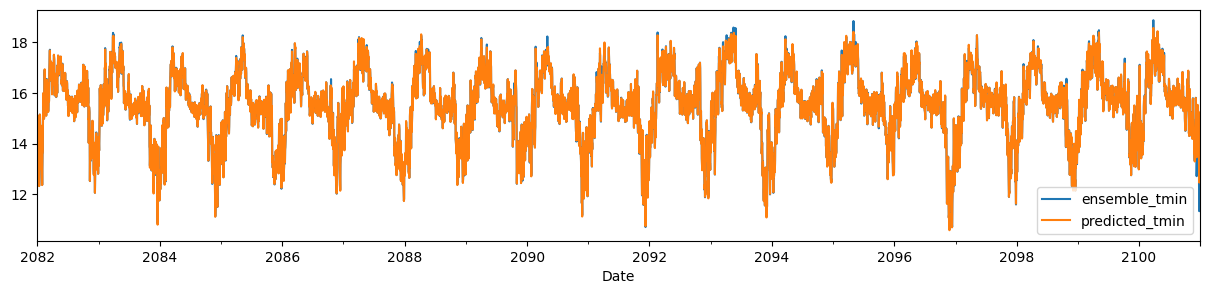

In [ ]:
df_predt2[['ensemble_tmin','predicted_tmin']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.021502483591928894
MSE is 0.0025844079926620428
RMSE is 0.05083707301430761
R2 is 0.9985050811147381


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.000, test: 0.003


##### 8.5

In [ ]:
Ensemble2=pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/8.5Ensemble.csv')
Ensemble2['Year']=pd.to_datetime(Ensemble2.Year, format='%m/%d/%Y')
Ensemble2.head()

Year  station_id  cnrm_pr  miroc_pr  cccma_pr  mpi_pr  ensemble_pr  \
0 2010-01-01           0     0.84      5.47      5.40     0.0       2.9275   
1 2010-01-02           0     0.84      6.16      0.00     0.0       1.7500   
2 2010-01-03           0     0.84      6.12      5.59     0.0       3.1375   
3 2010-01-04           0     0.84      6.40      7.16     0.0       3.6000   
4 2010-01-05           0     0.84      5.13      0.00     0.0       1.4925   

   cnrm_tmax  miroc_tmax  cccma_tmax  mpi_tmax  ensemble_tmax  cnrm_tmin  \
0      23.03       24.75       22.28     20.69        22.6875      13.52   
1      22.35       21.38       26.53     21.05        22.8275      12.86   
2      23.23       21.35       25.82     16.26        21.6650      12.11   
3      25.05       22.55       19.85     21.46        22.2275      11.94   
4      26.40       25.07       26.96     21.47        24.9750      13.26   

   miroc_tmin  cccma_tmin  mpi_tmin  ensemble_tmin  
0       14.95       10.68     11.57        12.6800  
1       13.99        9.93     11.94        12.1800  
2       13.92       13.18     12.84        13.0125  
3       14.62       12.54     11.53        12.6575  
4       14.50       11.16     10.66        12.3950

In [ ]:
data_train=Ensemble2.loc[Ensemble2.Year <= '2081-12-31']
data_test=Ensemble2.loc[Ensemble2.Year > '2081-12-31']

In [ ]:
data_train.shape, data_test.shape

((105192, 17), (26296, 17))

> <font color='orangered'>**Precipitation**

In [ ]:
X_train = data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_train = data_train[['ensemble_pr']]

In [ ]:
X_test = data_test[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
y_test = data_test[['ensemble_pr']]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.061407
0:	learn: 2.7311019	total: 10ms	remaining: 10s
1:	learn: 2.5967071	total: 18.8ms	remaining: 9.39s
2:	learn: 2.4724582	total: 26.5ms	remaining: 8.81s
3:	learn: 2.3549690	total: 34.8ms	remaining: 8.68s
4:	learn: 2.2450687	total: 42.9ms	remaining: 8.54s
5:	learn: 2.1392851	total: 45.4ms	remaining: 7.52s
6:	learn: 2.0415818	total: 50.8ms	remaining: 7.2s
7:	learn: 1.9487911	total: 59.4ms	remaining: 7.36s
8:	learn: 1.8601658	total: 67.5ms	remaining: 7.43s
9:	learn: 1.7801480	total: 75.4ms	remaining: 7.47s
10:	learn: 1.7029186	total: 83.4ms	remaining: 7.5s
11:	learn: 1.6284081	total: 91.6ms	remaining: 7.54s
12:	learn: 1.5585288	total: 99.6ms	remaining: 7.56s
13:	learn: 1.4915618	total: 109ms	remaining: 7.69s
14:	learn: 1.4282428	total: 118ms	remaining: 7.74s
15:	learn: 1.3684580	total: 125ms	remaining: 7.67s
16:	learn: 1.3119774	total: 134ms	remaining: 7.77s
17:	learn: 1.2595980	total: 143ms	remaining: 7.79s
18:	learn: 1.2081521	total: 151ms	remaining: 7.78s
19:	

In [ ]:
# view the feature scores
train=data_train[['cnrm_pr',	'miroc_pr',	'cccma_pr',	'mpi_pr']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

cccma_pr    36.627649
cnrm_pr     23.924623
mpi_pr      23.513030
miroc_pr    15.934699
dtype: float64

<ipython-input-87-ab67d6bc26fa>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


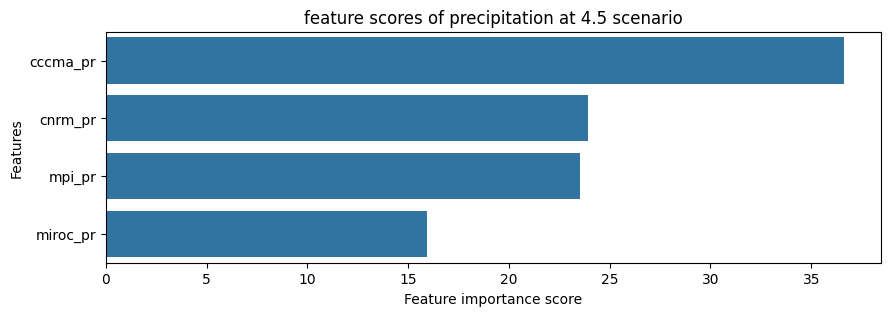

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of precipitation at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_pred2 = pd.DataFrame(y_test, columns=['ensemble_pr'])
df_pred2['predicted_pr']= Y_test_pred
df_pred2['Date'] = pd.to_datetime(data_test.Date, format='%m/%d/%Y')
# df_pred2['station_id'] = data_test['station_id']
#df_pred2 = df_pred2.reset_index()
df_pred2=df_pred2[['Date','ensemble_pr','predicted_pr']]
df_pred2 = df_pred2.set_index('Date')
df_pred2.head()

ensemble_pr  predicted_pr
Date                                 
2015-03-01       3.3775      3.314647
2015-03-02       2.9875      2.966953
2015-03-03       2.2325      2.152791
2015-03-04       1.7450      1.762803
2015-03-05       1.5150      1.496519

In [ ]:
df_pred2.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP8.5PrecipPredictedEnsemble.csv')

In [ ]:
# df_pred2['Date']=pd.to_datetime(df_pred2.Date, format='%Y/%m/%d')
df_pred2['Year']=df_pred2['Date'].dt.year
df_pred2['Month']=df_pred2['Date'].dt.month
df_pred2

Date  ensemble_pr  predicted_pr  Year  Month
59    2015-03-01       3.3775      3.314647  2015      3
60    2015-03-02       2.9875      2.966953  2015      3
61    2015-03-03       2.2325      2.152791  2015      3
62    2015-03-04       1.7450      1.762803  2015      3
63    2015-03-05       1.5150      1.496519  2015      3
...          ...          ...           ...   ...    ...
31314 2100-09-26      15.8150     15.260802  2100      9
31315 2100-09-27      10.7125     10.914202  2100      9
31316 2100-09-28       6.8075      6.878103  2100      9
31317 2100-09-29      10.5150     10.290677  2100      9
31318 2100-09-30      14.4275     14.132351  2100      9

[18404 rows x 5 columns]

In [ ]:
m=[]
for i in ((df_pred2.Year).unique()):
    y=df_pred2['ensemble_pr'].loc[df_pred2.Year==i].mean(),df_pred2['predicted_pr'].loc[df_pred2.Year==i].mean()
    m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_pr','predicted_pr']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Year'] = df_pred2.Year.unique()
df = df[['Year','ensemble_pr','predicted_pr']]
df

Year ensemble_pr predicted_pr
0   2015    7.976519     7.965004
1   2016    7.368493     7.370207
2   2017    6.664007     6.692097
3   2018    7.550397     7.505673
4   2019    7.499743     7.544998
..   ...         ...          ...
81  2096    9.212243     8.902449
82  2097    9.170748     9.051006
83  2098    8.341776     8.231556
84  2099    8.687617     8.516785
85  2100    9.479194     9.196699

[86 rows x 3 columns]

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/annualCBPredictedSSP85P.csv', index=False)

<Axes: xlabel='Date'>

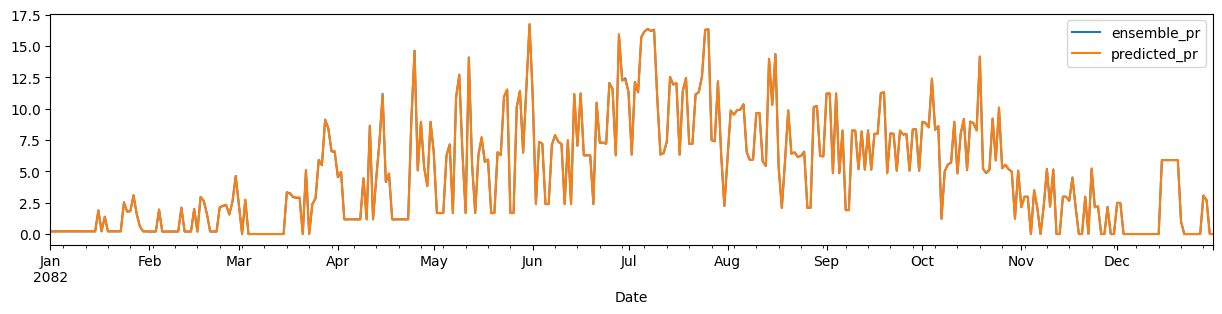

In [ ]:
df_pred2[['ensemble_pr','predicted_pr']].loc[df_pred2.station_id == 0][:365].plot(figsize=(15, 3))

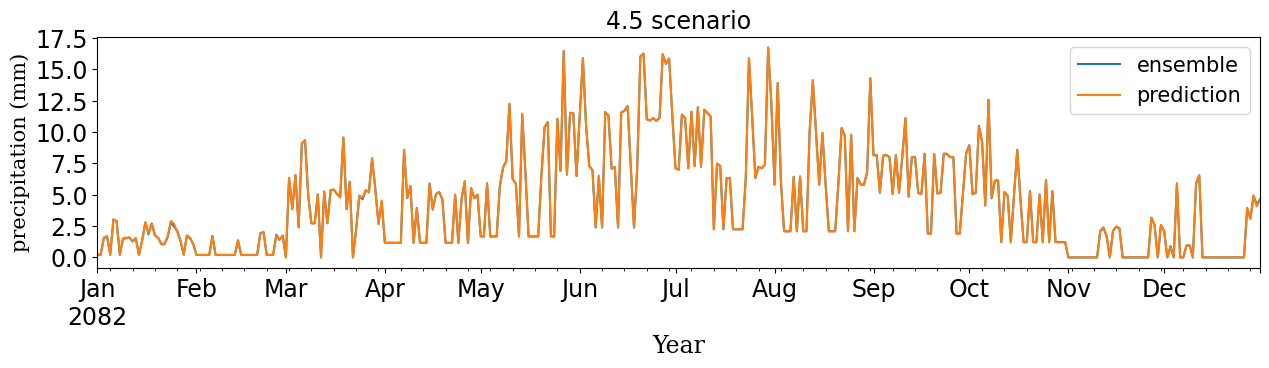

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(15, 3))
df_pred1['ensemble_pr'].loc[df_pred2.station_id == 0][:365].plot(ax=ax, label='ensemble')
df_pred1['predicted_pr'].loc[df_pred2.station_id == 0][:365].plot(ax=ax, label='prediction')
plt.title(fontsize=17,label='4.5 scenario')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

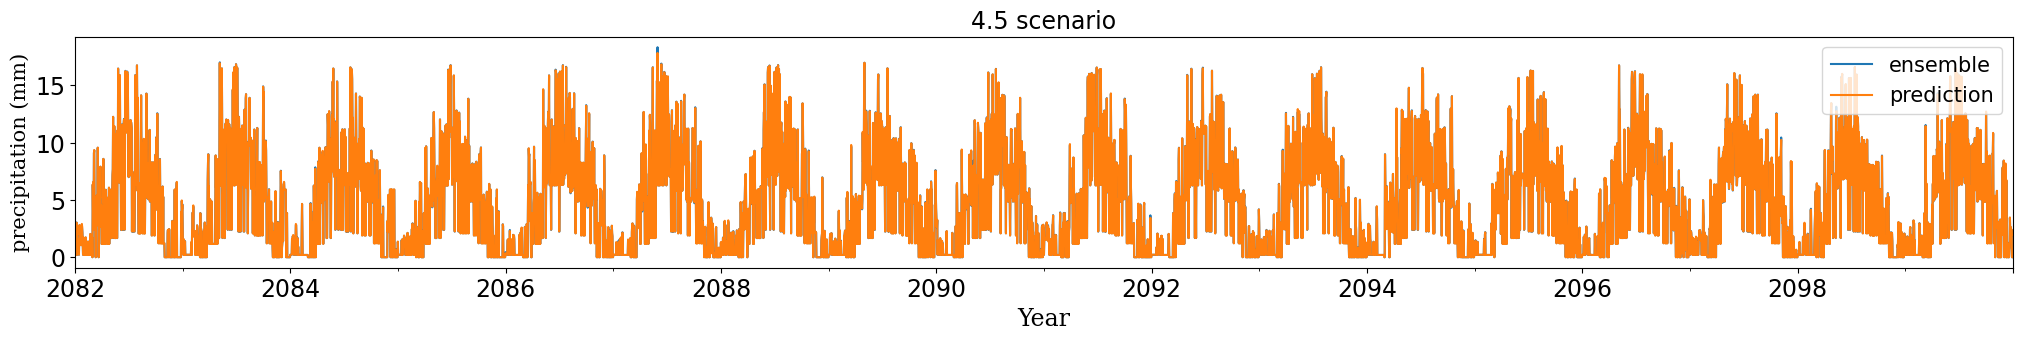

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred1['ensemble_pr'].loc[df_pred2.station_id == 0].plot(ax=ax, label='ensemble')
df_pred1['predicted_pr'].loc[df_pred2.station_id == 0].plot(ax=ax, label='prediction')
plt.title(fontsize=17,label='4.5 scenario')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

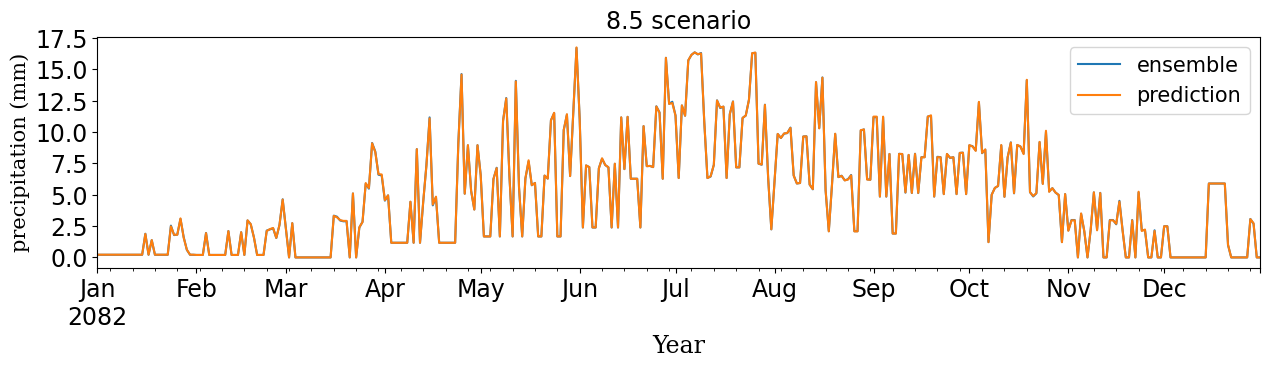

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(15, 3))
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 0][:365].plot(ax=ax, label='ensemble')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 0][:365].plot(ax=ax, label='prediction')
plt.title(fontsize=17,label='8.5 scenario')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

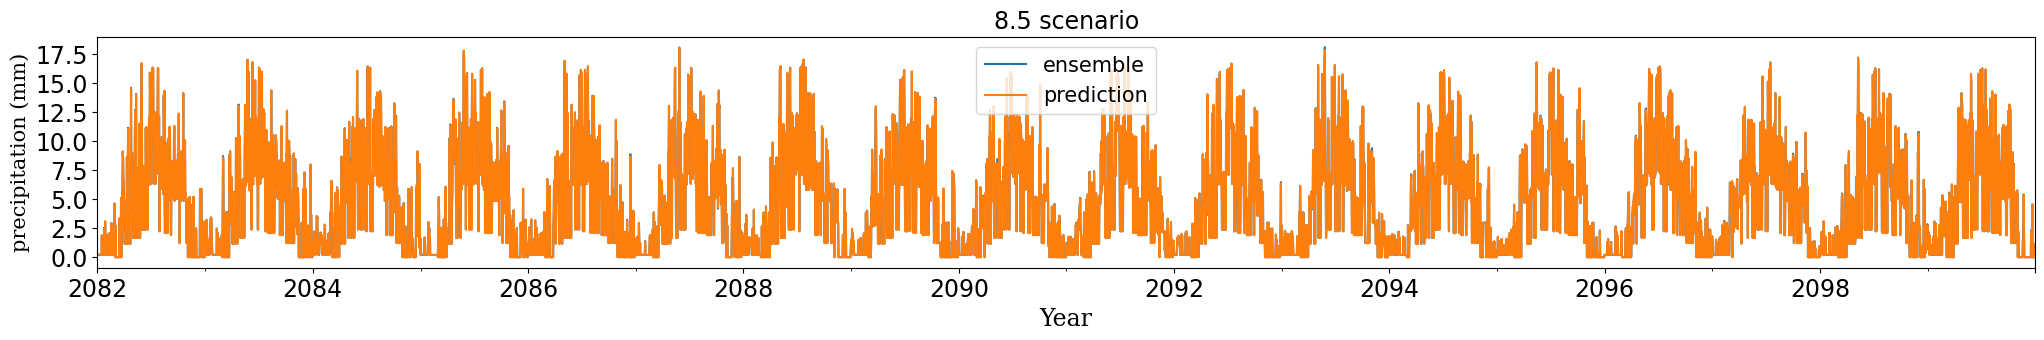

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 0].plot(ax=ax, label='ensemble')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 0].plot(ax=ax, label='prediction')
plt.title(fontsize=17,label='8.5 scenario')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.22347226396959413
MSE is 0.5464917853310787
RMSE is 0.7392508270750048
R2 is 0.9689480484126193


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.006, test: 0.546


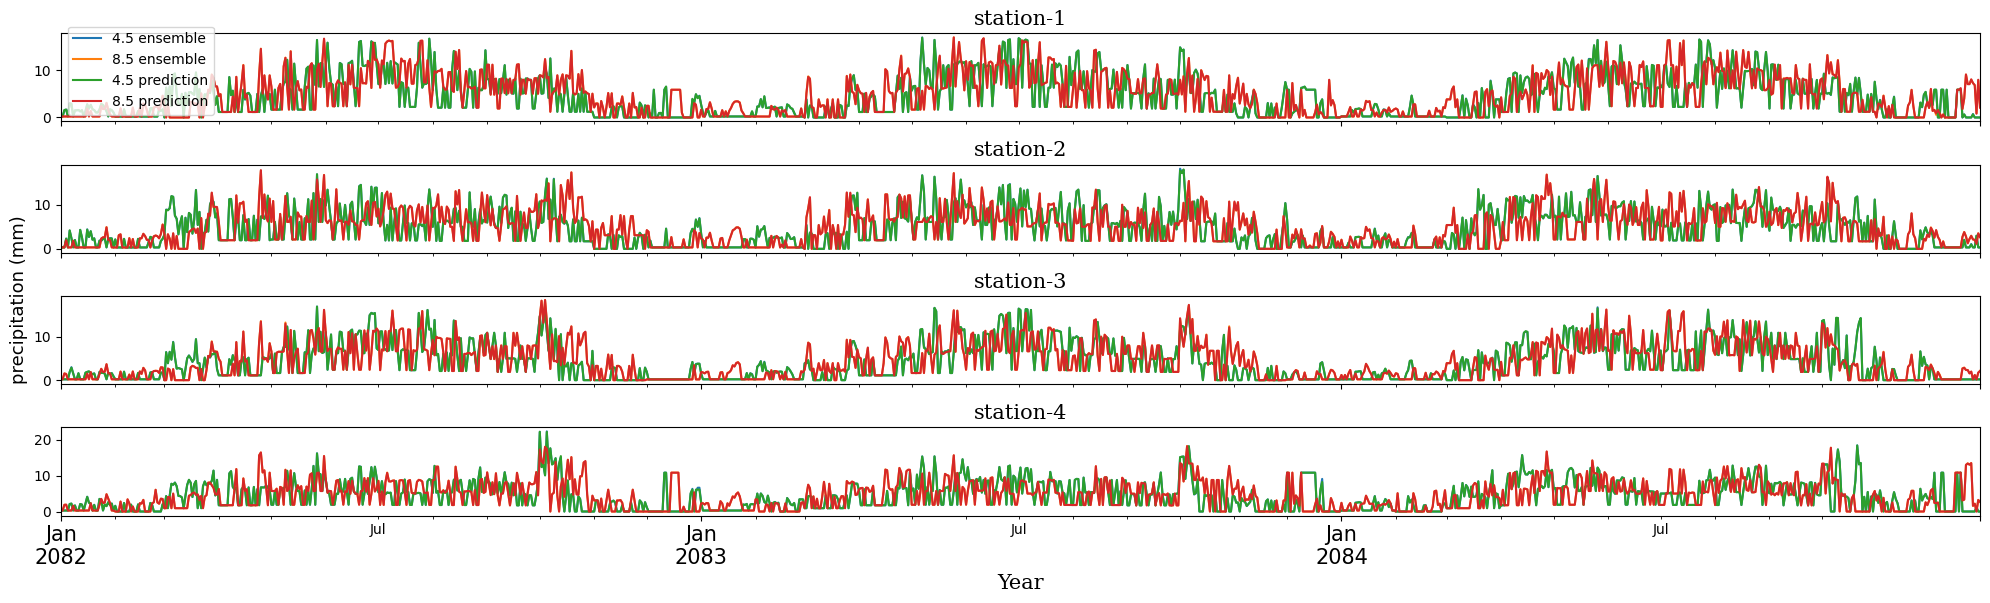

In [ ]:
# Plot time series
# ==============================================================================
font = {'family':'serif','color':'black','size':15}
x=df_pred.index
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20, 6), sharex=True)
#plt.title(fontsize=17,label='Actual Vs predicted T2M_MAX')

df_pred1['ensemble_pr'].loc[df_pred1.station_id == 0][:1095].plot(ax=axes[0], label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 0][:1095].plot(ax=axes[0], label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 0][:1095].plot(ax=axes[0], label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 0][:1095].plot(ax=axes[0], label='8.5 prediction')
axes[0].set_xlabel("Year", fontdict = font)
axes[0].set_title('station-1',fontdict = font)
axes[0].legend(fontsize=10)

df_pred1['ensemble_pr'].loc[df_pred1.station_id == 1][:1095].plot(ax=axes[1], label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 1][:1095].plot(ax=axes[1], label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 1][:1095].plot(ax=axes[1], label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 1][:1095].plot(ax=axes[1], label='8.5 prediction')
axes[1].set_xlabel("Year", fontdict = font)
axes[1].set_title('station-2',fontdict = font)

df_pred1['ensemble_pr'].loc[df_pred1.station_id == 2][:1095].plot(ax=axes[2], label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 2][:1095].plot(ax=axes[2], label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 2][:1095].plot(ax=axes[2], label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 2][:1095].plot(ax=axes[2], label='8.5 prediction')
axes[2].set_xlabel("Year", fontdict = font)
axes[2].set_title('station-3',fontdict = font)
axes[2].set_ylabel("precipitation (mm)",fontsize= 13, loc='bottom')

df_pred1['ensemble_pr'].loc[df_pred1.station_id == 3][:1095].plot(ax=axes[3], label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 3][:1095].plot(ax=axes[3], label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 3][:1095].plot(ax=axes[3], label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 3][:1095].plot(ax=axes[3], label='8.5 prediction')
axes[3].set_xlabel("Year", fontdict = font)
axes[3].set_title('station-4',fontdict = font)


#plt.yticks(fontsize=15)
#plt.ylabel("temprature (celicious)",fontdict = font,loc = "center")
fig.tight_layout()
plt.xticks(fontsize=15)
plt.show();

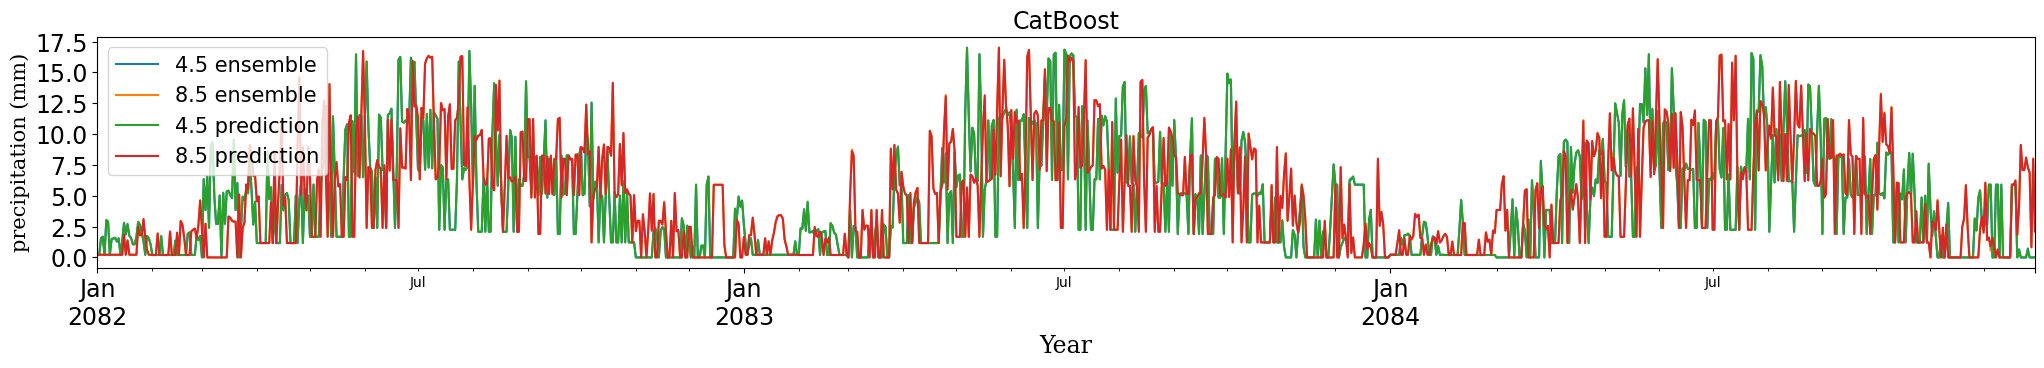

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred1['ensemble_pr'].loc[df_pred1.station_id == 0][:1095].plot(ax=ax, label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 0][:1095].plot(ax=ax, label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 0][:1095].plot(ax=ax, label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 0][:1095].plot(ax=ax, label='8.5 prediction')
plt.title(fontsize=17,label='CatBoost')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

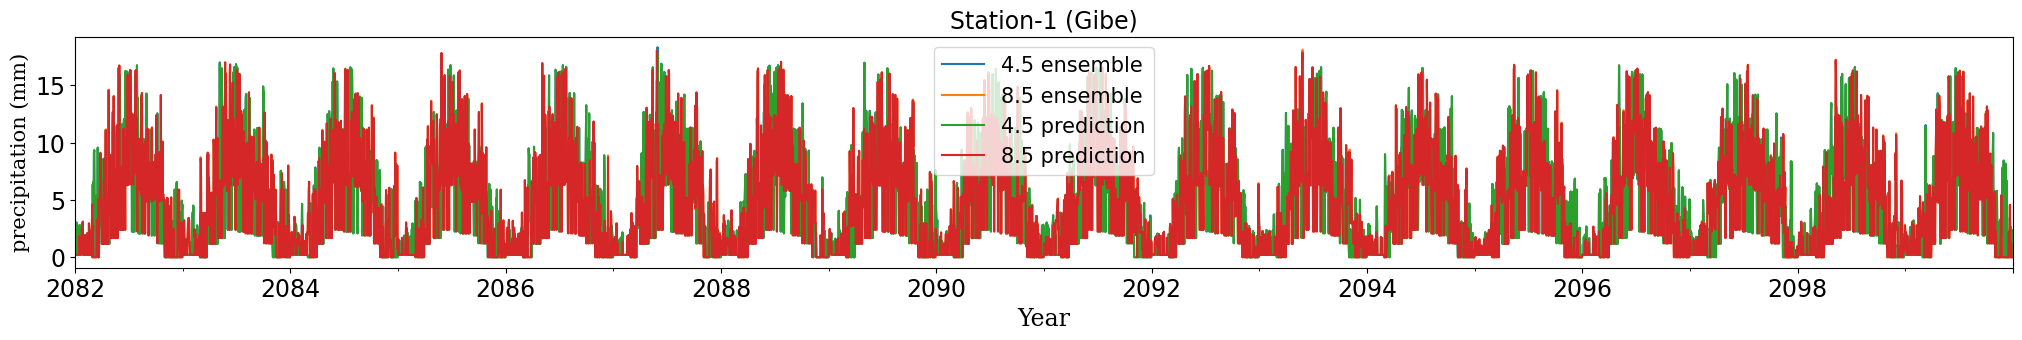

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred1['ensemble_pr'].loc[df_pred1.station_id == 0].plot(ax=ax, label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 0].plot(ax=ax, label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 0].plot(ax=ax, label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 0].plot(ax=ax, label='8.5 prediction')
plt.title(fontsize=17,label='Station-1 (Gibe)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

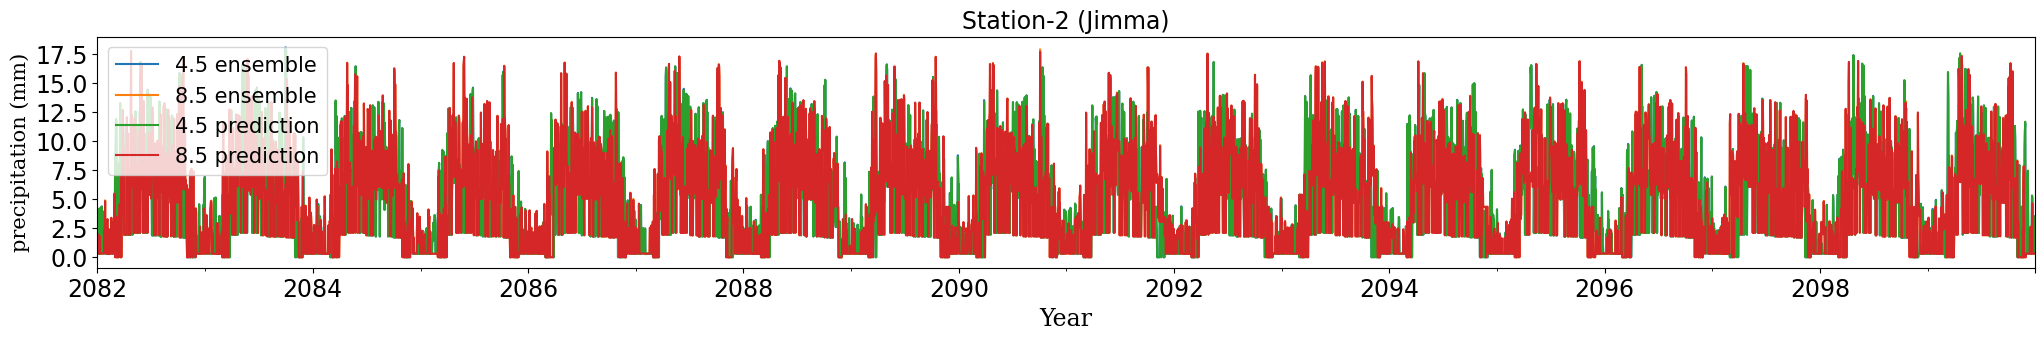

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred1['ensemble_pr'].loc[df_pred1.station_id == 1].plot(ax=ax, label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 1].plot(ax=ax, label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 1].plot(ax=ax, label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 1].plot(ax=ax, label='8.5 prediction')
plt.title(fontsize=17,label='Station-2 (Jimma)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

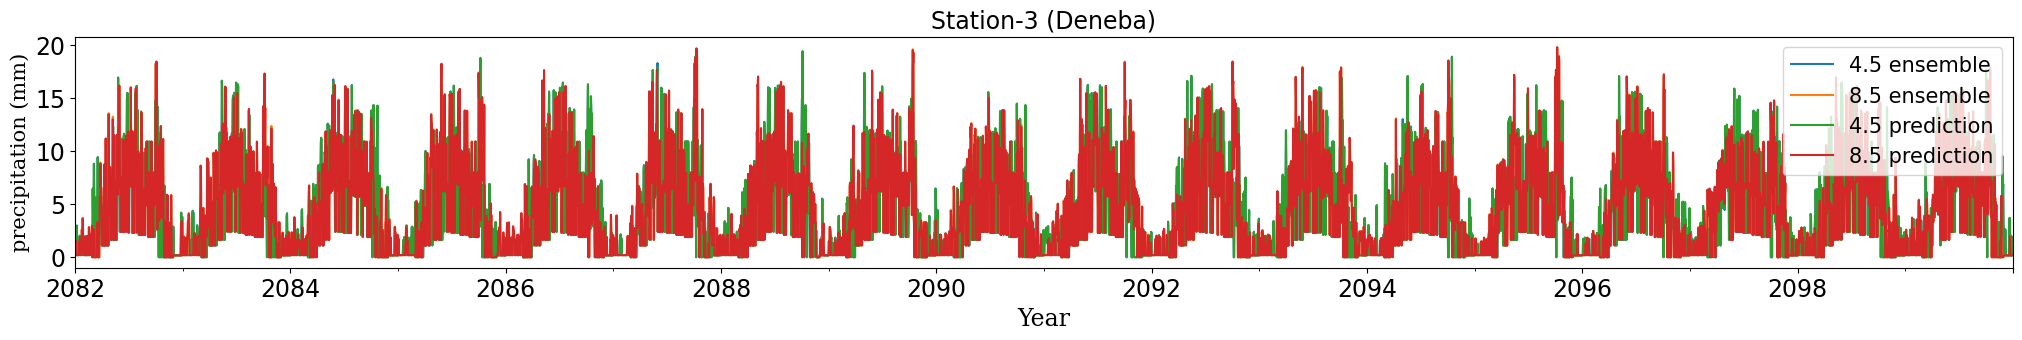

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred1['ensemble_pr'].loc[df_pred1.station_id == 2].plot(ax=ax, label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 2].plot(ax=ax, label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 2].plot(ax=ax, label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 2].plot(ax=ax, label='8.5 prediction')
plt.title(fontsize=17,label='Station-3 (Deneba)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

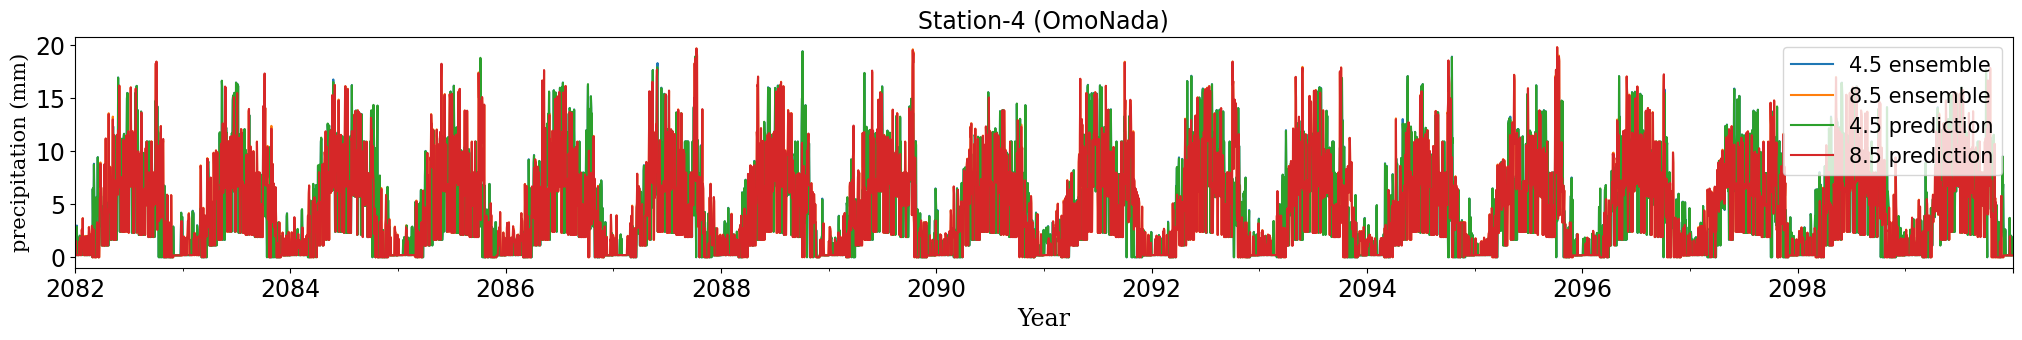

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred1['ensemble_pr'].loc[df_pred1.station_id == 2].plot(ax=ax, label='4.5 ensemble')
df_pred2['ensemble_pr'].loc[df_pred2.station_id == 2].plot(ax=ax, label='8.5 ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 2].plot(ax=ax, label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 2].plot(ax=ax, label='8.5 prediction')
plt.title(fontsize=17,label='Station-4 (OmoNada)')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

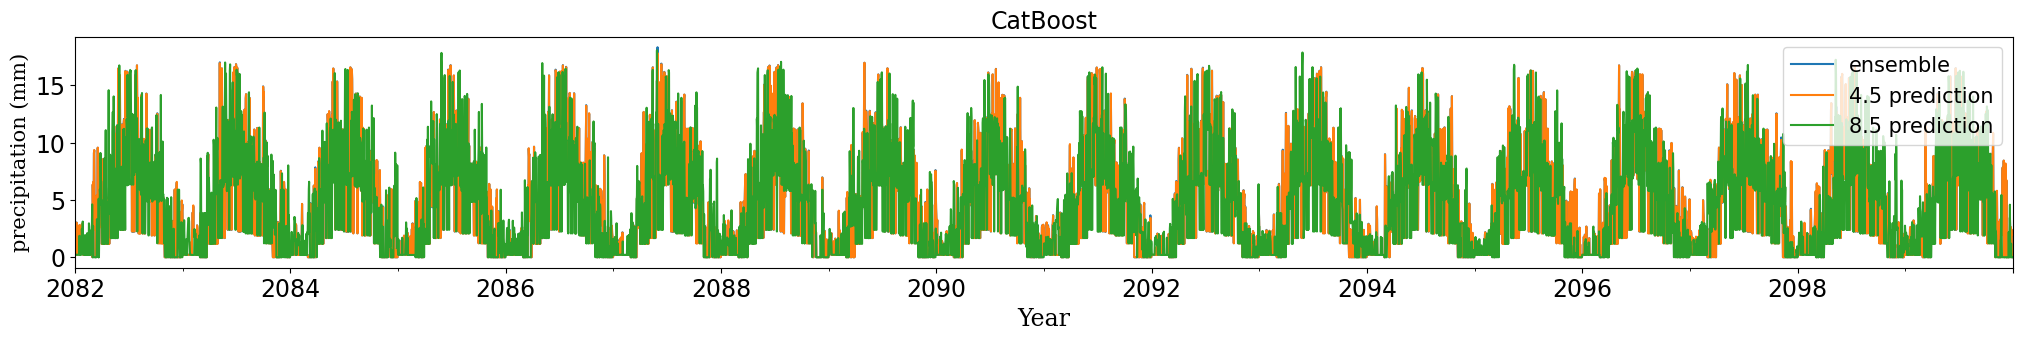

In [ ]:
# Plot
# ==============================================================================
font = {'family':'serif','color':'black','size':17}
font2 = {'family':'serif','color':'black','size':15}

fig, ax = plt.subplots(figsize=(25, 3))
df_pred1['ensemble_pr'].loc[df_pred1.station_id == 0].plot(ax=ax, label='ensemble')
df_pred1['predicted_pr'].loc[df_pred1.station_id == 0].plot(ax=ax, label='4.5 prediction')
df_pred2['predicted_pr'].loc[df_pred2.station_id == 0].plot(ax=ax, label='8.5 prediction')
plt.title(fontsize=17,label='CatBoost')
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
ax.set_xlabel("Year", fontdict = font)
ax.set_ylabel("precipitation (mm)",fontdict = font2)
ax.legend(fontsize=15);

> <font color='orangered'> **Temprature**

>> <font color='green'> **Tmax**

In [ ]:
data_train.columns

Index(['Date', 'tmax', 'cnrm_dm_tmax', 'cccma_dm_tmax', 'miroc_vs_tmax',
       'mpi_dm_tmax', 'ensemble_tmax', 'tmin', 'cnrm_dm_tmin', 'cccma_dm_tmin',
       'miroc_vs_tmin', 'mp[i_dm_tmin', 'ensemble_tmin', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [ ]:
X_train = data_train[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_train = data_train[['ensemble_tmax']]

In [ ]:
X_test = data_test[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
y_test = data_test[['ensemble_tmax']]

In [ ]:
X_test.describe()

cnrm_dm_tmax  miroc_vs_tmax  cccma_dm_tmax  mpi_dm_tmax
count   6939.000000    6939.000000    6939.000000  6939.000000
mean      28.334241      28.691572      27.264968    25.787211
std        4.072388       3.298466       3.341265     3.763240
min       19.360000      21.720000      20.330000     1.880000
25%       25.130000      25.910000      24.610000    23.290000
50%       27.220000      28.010000      26.820000    25.120000
75%       31.280000      31.220000      29.680000    28.320000
max       40.970000      38.790000      38.420000    40.820000

In [ ]:
#fill those inf with some value
# value = X_test['mpi_tmax'].quantile(0.98)
# X_test = X_test.replace(np.inf, value)

In [ ]:
#This removes the rows that contain infinity or NaN values
#X_test=X_test[np.isfinite(X_test).all(1)]

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.067856
0:	learn: 2.4513472	total: 62.8ms	remaining: 1m 2s
1:	learn: 2.3080789	total: 67.7ms	remaining: 33.8s
2:	learn: 2.1727881	total: 73.4ms	remaining: 24.4s
3:	learn: 2.0492842	total: 77.8ms	remaining: 19.4s
4:	learn: 1.9329236	total: 82.8ms	remaining: 16.5s
5:	learn: 1.8213821	total: 88.3ms	remaining: 14.6s
6:	learn: 1.7183814	total: 92.4ms	remaining: 13.1s
7:	learn: 1.6219827	total: 98.5ms	remaining: 12.2s
8:	learn: 1.5334663	total: 102ms	remaining: 11.3s
9:	learn: 1.4488905	total: 108ms	remaining: 10.7s
10:	learn: 1.3694091	total: 113ms	remaining: 10.2s
11:	learn: 1.2956192	total: 118ms	remaining: 9.73s
12:	learn: 1.2259723	total: 123ms	remaining: 9.32s
13:	learn: 1.1621312	total: 128ms	remaining: 9.02s
14:	learn: 1.1001684	total: 133ms	remaining: 8.75s
15:	learn: 1.0427208	total: 138ms	remaining: 8.49s
16:	learn: 0.9891781	total: 148ms	remaining: 8.58s
17:	learn: 0.9396015	total: 174ms	remaining: 9.5s
18:	learn: 0.8932591	total: 186ms	remaining: 9.58s
19:	

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmax',	'miroc_vs_tmax',	'cccma_dm_tmax',	'mpi_dm_tmax']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mpi_dm_tmax      30.806435
cnrm_dm_tmax     27.653403
miroc_vs_tmax    21.402126
cccma_dm_tmax    20.138036
dtype: float64

<ipython-input-74-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


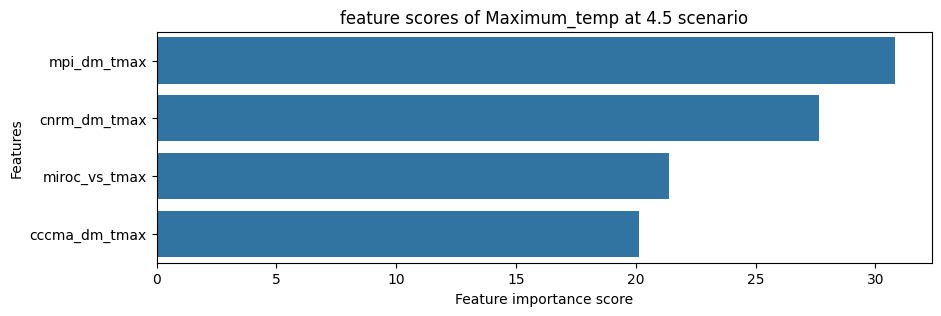

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_predt3 = pd.DataFrame(y_test, columns=['ensemble_tmax'])
df_predt3['predicted_tmax']= Y_test_pred
df_predt3['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_predt3['station_id'] = data_test['station_id']
#df_predt3 = df_predt3.reset_index()
df_predt3=df_predt3[['Date','ensemble_tmax','predicted_tmax']]
df_predt3 = df_predt3.set_index('Date')
df_predt3.head()

ensemble_tmax  predicted_tmax
Date                                     
2082-01-01        29.3675       29.435265
2082-01-02        27.9525       27.964136
2082-01-03        26.8400       26.859179
2082-01-04        28.2975       28.332178
2082-01-05        28.5625       28.561178

In [ ]:
df_predt3.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP8.5CBTmax.csv')

In [ ]:
tdf = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP8.5CBTmax.csv')

In [ ]:
tdf['Date']=pd.to_datetime(tdf.Date, format='%Y/%m/%d')
tdf['Year']=tdf['Date'].dt.year
tdf['Month']=tdf['Date'].dt.month
tdf

Date  ensemble_tmax  predicted_tmax  Year  Month
0    2082-01-01      29.367500       29.435265  2082      1
1    2082-01-02      27.952500       27.964136  2082      1
2    2082-01-03      26.840000       26.859179  2082      1
3    2082-01-04      28.297500       28.332178  2082      1
4    2082-01-05      28.562500       28.561178  2082      1
...         ...            ...             ...   ...    ...
6934 2100-12-27      29.276667       28.765326  2100     12
6935 2100-12-28      29.283333       28.765326  2100     12
6936 2100-12-29      29.613333       29.044266  2100     12
6937 2100-12-30      29.396667       28.930574  2100     12
6938 2100-12-31      29.236667       28.758636  2100     12

[6939 rows x 5 columns]

In [ ]:
m=[]
for i in ((tdf.Year).unique()):
    y=tdf['ensemble_tmax'].loc[tdf.Year==i].mean(),tdf['predicted_tmax'].loc[tdf.Year==i].mean()
    m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmax','predicted_tmax']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Year'] = tdf.Year.unique()
df = df[['Year','ensemble_tmax','predicted_tmax']]
df

Year ensemble_tmax predicted_tmax
0   2082     27.163397      27.165273
1   2083     26.927404      26.923368
2   2084     27.275123      27.189181
3   2085     26.747705      26.748351
4   2086     27.337767      27.311558
5   2087     26.975568      26.975136
6   2088     27.703183      27.645519
7   2089     27.494452      27.452920
8   2090     27.916904      27.847291
9   2091     27.410445      27.392516
10  2092     27.832275      27.806355
11  2093     27.575007      27.568805
12  2094     27.994295      27.928729
13  2095     27.312747      27.292437
14  2096     27.460505      27.452228
15  2097     27.650836      27.614262
16  2098     28.264233      28.103346
17  2099     27.880836      27.826535
18  2100     27.972788      27.912055

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/annualCBPredictedSSP8.5tmax.csv', index=False)

In [ ]:
m=[]

#mordervation
for i in range(1,13):
  y=tdf['ensemble_tmax'].loc[tdf.Month == i].mean(), tdf['predicted_tmax'].loc[tdf.Month == i].mean()
  m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmax','predicted_tmax']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Month'] = tdf.Month.unique()
df = df[['Month','ensemble_tmax','predicted_tmax']]
df

Month ensemble_tmax predicted_tmax
0      1     29.491948      29.436398
1      2     32.213008      32.059026
2      3     31.786065      31.587616
3      4     30.447724      30.435735
4      5     29.992716      29.970095
5      6     25.968377      25.968395
6      7     24.490199      24.483848
7      8     23.952182      23.951708
8      9     24.196316      24.193362
9     10     25.026205      25.016542
10    11     25.924763      25.923153
11    12     27.068413      27.059019

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/monthlyCBPredictedSSP8.5tmax.csv', index=False)

<Axes: xlabel='Date'>

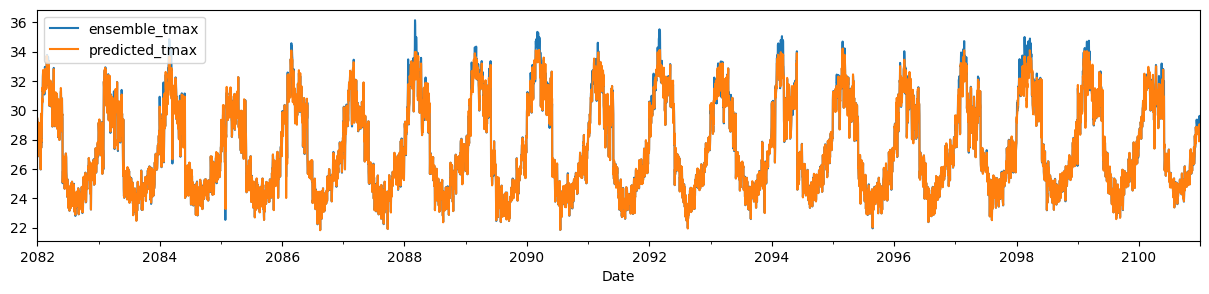

In [ ]:
df_predt3[['ensemble_tmax','predicted_tmax']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.08278002164359065
MSE is 0.04164046463043944
RMSE is 0.20405995351964443
R2 is 0.9957019765498963


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))

MSE train: 0.002, test: 0.042


>> <font color='green'>**Tmin**

In [ ]:
data_train.columns

Index(['Date', 'tmax', 'cnrm_dm_tmax', 'cccma_dm_tmax', 'miroc_vs_tmax',
       'mpi_dm_tmax', 'ensemble_tmax', 'tmin', 'cnrm_dm_tmin', 'cccma_dm_tmin',
       'miroc_vs_tmin', 'mp[i_dm_tmin', 'ensemble_tmin', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

In [ ]:
X_train = data_train[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
y_train = data_train[['ensemble_tmin']]

In [ ]:
X_test = data_test[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
y_test = data_test[['ensemble_tmin']]

In [ ]:
#fill those inf with some value
# value = X_test['miroc_tmin'].quantile(0.98)
# X_test = X_test.replace(np.inf, value)

In [ ]:
cbmodel = CatBoostRegressor()
cbmodel.fit(X_train, y_train)

Learning rate set to 0.067856
0:	learn: 2.1372147	total: 16.4ms	remaining: 16.4s
1:	learn: 2.0097874	total: 30.2ms	remaining: 15.1s
2:	learn: 1.8893978	total: 45.8ms	remaining: 15.2s
3:	learn: 1.7774521	total: 58ms	remaining: 14.4s
4:	learn: 1.6759506	total: 69.9ms	remaining: 13.9s
5:	learn: 1.5769114	total: 81.1ms	remaining: 13.4s
6:	learn: 1.4856723	total: 93.7ms	remaining: 13.3s
7:	learn: 1.3995392	total: 106ms	remaining: 13.1s
8:	learn: 1.3195403	total: 118ms	remaining: 13s
9:	learn: 1.2456323	total: 129ms	remaining: 12.7s
10:	learn: 1.1739859	total: 142ms	remaining: 12.7s
11:	learn: 1.1079585	total: 153ms	remaining: 12.6s
12:	learn: 1.0464738	total: 163ms	remaining: 12.3s
13:	learn: 0.9889578	total: 174ms	remaining: 12.2s
14:	learn: 0.9348721	total: 189ms	remaining: 12.4s
15:	learn: 0.8840231	total: 198ms	remaining: 12.2s
16:	learn: 0.8357520	total: 209ms	remaining: 12.1s
17:	learn: 0.7921935	total: 221ms	remaining: 12.1s
18:	learn: 0.7498057	total: 231ms	remaining: 11.9s
19:	lear

In [ ]:
# view the feature scores
train=data_train[['cnrm_dm_tmin',	'miroc_vs_tmin',	'cccma_dm_tmin',	'mp[i_dm_tmin']]
feature_scores = pd.Series(cbmodel.feature_importances_, index=train.columns).sort_values(ascending=False)

feature_scores

mp[i_dm_tmin     51.044716
cnrm_dm_tmin     17.265322
cccma_dm_tmin    16.617714
miroc_vs_tmin    15.072248
dtype: float64

<ipython-input-99-08b78efcb846>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(feature_scores.index)


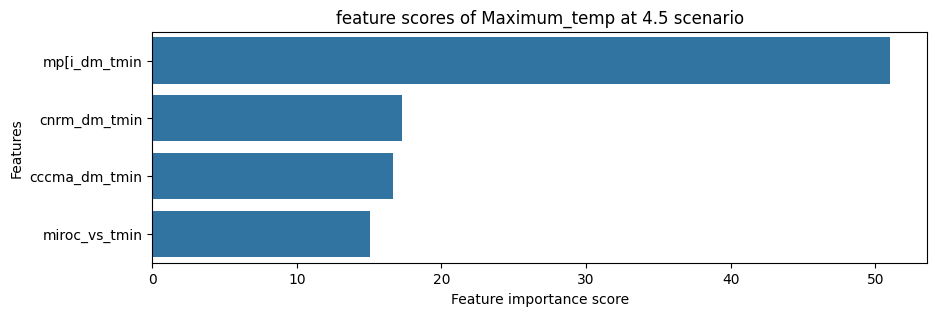

In [ ]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 3))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("feature scores of Maximum_temp at 4.5 scenario")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [ ]:
Y_train_pred = cbmodel.predict(X_train)
Y_test_pred = cbmodel.predict(X_test)

In [ ]:
df_pred4 = pd.DataFrame(y_test, columns=['ensemble_tmin'])
df_pred4['predicted_tmin']= Y_test_pred
df_pred4['Date'] = pd.to_datetime(data_test.Date, format='%Y/%m/%d')
# df_pred4['station_id'] = data_test['station_id']
#df_pred4 = df_pred4.reset_index()
df_pred4=df_pred4[['Date','ensemble_tmin','predicted_tmin']]
df_pred4 = df_pred4.set_index('Date')
df_pred4.head()

ensemble_tmin  predicted_tmin
Date                                     
2082-01-01        13.7400       13.693599
2082-01-02        14.4475       14.435542
2082-01-03        13.8650       13.852956
2082-01-04        13.5325       13.549834
2082-01-05        13.6500       13.665194

In [ ]:
tdf = pd.read_csv('../content/drive/My Drive/Colab Notebooks/Drought/GilgelGibe/SSP8.5CBTmin.csv')

In [ ]:
mtdf['Date']=pd.to_datetime(tdf.Date, format='%Y/%m/%d')
tdf['Year']=tdf['Date'].dt.year
tdf['Month']=tdf['Date'].dt.month
tdf

Date  ensemble_tmin  predicted_tmin  Year  Month
0    2082-01-01      13.740000       13.693599  2082      1
1    2082-01-02      14.447500       14.435542  2082      1
2    2082-01-03      13.865000       13.852956  2082      1
3    2082-01-04      13.532500       13.549834  2082      1
4    2082-01-05      13.650000       13.665194  2082      1
...         ...            ...             ...   ...    ...
6934 2100-12-27      12.563333       14.618561  2100     12
6935 2100-12-28      12.243333       14.358949  2100     12
6936 2100-12-29      12.173333       14.307518  2100     12
6937 2100-12-30      12.203333       14.315208  2100     12
6938 2100-12-31      11.346667       13.673622  2100     12

[6939 rows x 5 columns]

In [ ]:
m=[]
for i in ((tdf.Year).unique()):
    y=tdf['ensemble_tmin'].loc[tdf.Year==i].mean(),tdf['predicted_tmin'].loc[tdf.Year==i].mean()
    m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmin','predicted_tmin']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Year'] = tdf.Year.unique()
df = df[['Year','ensemble_tmin','predicted_tmin']]
df

Year ensemble_tmin predicted_tmin
0   2082     15.187774      15.185600
1   2083     15.244418      15.237463
2   2084     15.392445      15.389943
3   2085     15.090034      15.083569
4   2086     15.181418      15.181721
5   2087     15.178541      15.179132
6   2088     15.319945      15.319294
7   2089     15.487130      15.471207
8   2090     15.386541      15.366235
9   2091     15.522021      15.521194
10  2092     15.620444      15.612229
11  2093     15.277416      15.268128
12  2094     15.624452      15.614140
13  2095     15.384500      15.380643
14  2096     15.759365      15.750122
15  2097     15.789411      15.773597
16  2098     15.574724      15.555002
17  2099     15.828699      15.805294
18  2100     15.890906      15.979081

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/annualCBPredictedSSP8.5tmin.csv', index=False)

In [ ]:
m=[]

#mordervation
for i in range(1,13):
  y=tdf['ensemble_tmin'].loc[tdf.Month == i].mean(), tdf['predicted_tmin'].loc[tdf.Month == i].mean()
  m.append(y)

In [ ]:
df = pd.DataFrame(m, columns=[['ensemble_tmin','predicted_tmin']])
#df['date'] = pd.date_range(start='1982', periods=len(df), freq='Y')
df['Month'] = tdf.Month.unique()
df = df[['Month','ensemble_tmin','predicted_tmin']]
df

Month ensemble_tmin predicted_tmin
0      1     13.707428      13.704553
1      2     14.817705      14.812335
2      3     16.172131      16.170298
3      4     17.131346      17.135743
4      5     17.852685      17.772747
5      6     16.765421      16.756710
6      7     16.052787      16.053981
7      8     15.789830      15.790218
8      9     16.094079      16.096589
9     10     15.745739      15.722156
10    11     13.121864      13.119502
11    12     12.252786      12.327053

In [ ]:
df.to_csv('../content/drive/My Drive/Colab Notebooks/Drought/monthlyCBPredictedSSP8.5tmin.csv', index=False)

<Axes: xlabel='Date'>

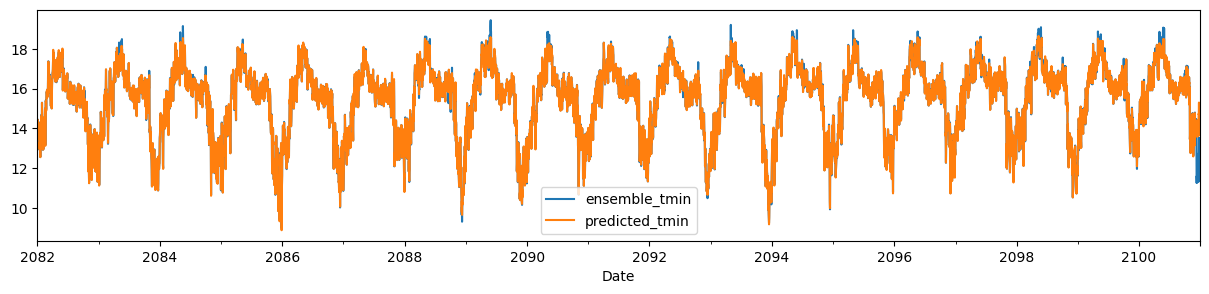

In [ ]:
df_pred4[['ensemble_tmin','predicted_tmin']].plot(figsize=(15, 3))

In [ ]:
import math
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
### Test data performance metrics
mae = mean_absolute_error(y_test, Y_test_pred)
mse = mean_squared_error(y_test, Y_test_pred)
r2 = r2_score(y_test, Y_test_pred)
rmse = math.sqrt(mean_squared_error(y_test, Y_test_pred))
print("The model performance for testing set:")
for i in range(38):
    print("-", end='')
print("\n")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 is {}'.format(r2))

The model performance for testing set:
--------------------------------------

MAE is 0.047702768317027536
MSE is 0.022241538619085992
RMSE is 0.1491359735915047
R2 is 0.9927442261916196


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (
    mean_squared_error(y_train, Y_train_pred),
    mean_squared_error(y_test, Y_test_pred)))
#print(f'Overfitting indicator: {mean_squared_error(y_test, Y_test_pred)} > {mean_squared_error(y_train, Y_train_pred)}')

MSE train: 0.001, test: 0.022
